<a href="https://colab.research.google.com/github/Chonnakarn-jir/CO2-Emissions-Trends/blob/main/Study%20of%20CO2%20Emissions%20Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ติดตั้งเครื่องมือที่ต้องใช้
คำสั่งนี้ใช้เพื่อติดตั้งเครื่องมือสำหรับจัดการข้อมูลและสร้างกราฟใน Python

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

เรียกใช้งานเครื่องมือที่ติดตั้ง
คำสั่งนี้ใช้เพื่อเรียกใช้งานไลบรารีที่เราติดตั้งไว้ก่อนหน้านี้

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

อัปโหลดไฟล์เข้าสู่ระบบ
คำสั่งนี้ใช้สำหรับอัปโหลดไฟล์เข้าไปใน Google Colab โดย Data Set มีทั้งหมด 4 ไฟล์ ดังนี้

- GHG2024.xlsx
- CO2024.xlsx
- GDP2024.xls
- Pop2024.xls

ที่มา DATA Set: https://databank.worldbank.org/source/world-development-indicators

In [3]:
from google.colab import files

uploaded = files.upload()

Saving GHG2024.xlsx to GHG2024 (1).xlsx


In [4]:
ghg2024 = pd.read_excel('GHG2024.xlsx', sheet_name='GHG_totals_by_country')
#อ่านไฟล์ Excel เข้าสู่ Python

In [5]:
print(ghg2024.head())

  EDGAR Country Code                 Country        1970        1971  \
0                ABW                   Aruba    0.036713    0.041538   
1                AFG             Afghanistan   15.437430   15.364077   
2                AGO                  Angola   18.998763   18.866057   
3                AIA                Anguilla    0.003355    0.003396   
4                AIR  International Aviation  172.478021  172.465452   

         1972        1973        1974        1975        1976        1977  \
0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
4  182.459819  190.296910  183.162104  177.165836  177.483077  193.593366   

   ...        2014        2015        2016        2017        2018  \
0  ...    0.469468    0.490990    

In [6]:
ghg2024.isnull().sum()
#ตรวจสอบ Missing Value

,0
EDGAR Country Code,2
Country,2
1970,2
1971,2
1972,2
1973,2
1974,2
1975,2
1976,2
1977,2


เริ่มทำการ Cleansing DATA ของ DATA SET ไฟล์ GHG2024.xlsx

In [7]:
ghg2024 = ghg2024[:-4] #Remove the last four rows from the dataset ghg2024

In [8]:
ghg2024.isnull().sum()

,0
EDGAR Country Code,0
Country,0
1970,0
1971,0
1972,0
1973,0
1974,0
1975,0
1976,0
1977,0


In [9]:
ghg2024.head()

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114


ปรับโครงสร้างข้อมูล
-จัดรูปแบบข้อมูลใหม่ → เปลี่ยนจากตารางที่มีปีแยกเป็นคอลัมน์ ให้เหลือแค่ 3 คอลัมน์หลัก: รหัสประเทศ, ประเทศ, ปี, และค่าการปล่อยก๊าซ

- แปลงปีให้เป็นตัวเลข → เพื่อให้สามารถเรียงลำดับและนำไปใช้วิเคราะห์ได้ถูกต้อง

- เรียงข้อมูลใหม่ → ให้เรียงตาม ประเทศ และ ปี เพื่อให้อ่านแนวโน้มการเปลี่ยนแปลงของแต่ละประเทศได้ง่ายขึ้น

In [10]:
# Melt the DataFrame
mghg2024 = ghg2024.melt(id_vars=["EDGAR Country Code", "Country"],
                     var_name="Year",
                     value_name="Value1")

# Convert Year to integer for proper sorting
mghg2024["Year"] = mghg2024["Year"].astype(int)

# Sort by country and year
mghg2024 = mghg2024.sort_values(by=["Country", "Year"])

In [11]:
mghg2024.head()

,EDGAR Country Code,Country,Year,Value1
1,AFG,Afghanistan,1970,15.437430
211,AFG,Afghanistan,1971,15.364077
421,AFG,Afghanistan,1972,13.316628
631,AFG,Afghanistan,1973,13.934875
841,AFG,Afghanistan,1974,15.177862


In [12]:
mghg2024.isnull().sum()

,0
EDGAR Country Code,0
Country,0
Year,0
Value1,0


In [13]:
mghg2024 = mghg2024.rename(columns={
    "EDGAR Country Code": "Country Code",
    "Value1": "Total GHG Emissions (MtCO2e)"
})

Total GHG emissions are measured in MtCO₂e (million tonnes of CO₂ equivalent).

MtCO₂e (Million Tonnes of CO₂ Equivalent) is a unit that measures greenhouse gas emissions by converting them into the equivalent impact of CO₂ based on their global warming potential.

In [14]:
mghg2024

,Country Code,Country,Year,Total GHG Emissions (MtCO2e)
1,AFG,Afghanistan,1970,15.437430
211,AFG,Afghanistan,1971,15.364077
421,AFG,Afghanistan,1972,13.316628
631,AFG,Afghanistan,1973,13.934875
841,AFG,Afghanistan,1974,15.177862
...,...,...,...,...
10499,ZWE,Zimbabwe,2019,28.369352
10709,ZWE,Zimbabwe,2020,26.770627
10919,ZWE,Zimbabwe,2021,28.878405
11129,ZWE,Zimbabwe,2022,29.825427


In [15]:
#Clean mghg2024 and mco2024
country_codes_to_remove = ['AIA', 'AIR', 'COK', 'ESH', 'FLK', 'GLP', 'MTQ', 'REU', 'SEA', 'SHN']

In [16]:
#Clean mghg2024
mghg2024 = mghg2024[~mghg2024['Country Code'].isin(country_codes_to_remove)]

In [17]:
mghg2024

,Country Code,Country,Year,Total GHG Emissions (MtCO2e)
1,AFG,Afghanistan,1970,15.437430
211,AFG,Afghanistan,1971,15.364077
421,AFG,Afghanistan,1972,13.316628
631,AFG,Afghanistan,1973,13.934875
841,AFG,Afghanistan,1974,15.177862
...,...,...,...,...
10499,ZWE,Zimbabwe,2019,28.369352
10709,ZWE,Zimbabwe,2020,26.770627
10919,ZWE,Zimbabwe,2021,28.878405
11129,ZWE,Zimbabwe,2022,29.825427


In [18]:
# Replace values where country_code is 'ANT' to 'CUW'
mghg2024.loc[mghg2024['Country Code'] == 'ANT', ['Country Code']] = ['CUW']
print(mghg2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE'
 'CIV' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA'
 'GIB' 'GRC' 'GRL' 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN'
 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ'
 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX'
 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK'
 'MKD' 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN'
 'SCG' 'SYC' 'SLE' 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'Z

In [19]:
# Mapping of Country Code to Country
country_mapping = {
    "CUW": "Curacao",
    "BHS": "Bahamas",
    "BRN": "Brunei Darussalam",
    "CIV": "Cote d Ivoire",
    "COD": "Congo, Dem. Rep.",
    "COG": "Congo",
    "EGY": "Egypt, Arab Rep.",
    "ESP": "Spain and Andorra",
    "FRO": "Faroe Islands",
    "GMB": "The Gambia",
    "HKG": "Hong Kong SAR, China",
    "IRN": "Iran, Islamic Rep.",
    "ISR": "Israel",
    "KGZ": "Kyrgyz Republic",
    "KNA": "Saint Kitts and Nevis",
    "KOR": "South Korea",
    "LAO": "Lao PDR",
    "LCA": "Saint Lucia",
    "MAC": "Macao SAR, China",
    "MMR": "Myanmar",
    "PRK": "North Korea",
    "RUS": "Russian Federation",
    "SDN": "Sudan and South Sudan",
    "STP": "Sao Tome and Principe",
    "SVK": "Slovak Rep.",
    "SYR": "Syrian Arab Rep.",
    "TUR": "Turkiye",
    "VCT": "Saint Vincent and the Grenadines",
    "VEN": "Venezuela",
    "YEM": "Yemen, Rep."
}

# Update the "Country" column based on the "Country Code"
mghg2024.loc[:, "Country"] = mghg2024["Country Code"].map(country_mapping).fillna(mghg2024["Country"])

In [20]:
print(mghg2024['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' 'Cote d Ivoire' 'Congo, Dem. Rep.' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France and Monaco'
 'French Guiana' 'French Polynesia' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hondu

In [21]:
mghg2024.isnull().sum()

,0
Country Code,0
Country,0
Year,0
Total GHG Emissions (MtCO2e),0


In [22]:
# เลือกข้อมูลของ CHN และ TWN
chn_twn_data = mghg2024[mghg2024['Country Code'].isin(['CHN', 'TWN'])]

# groupby 'Year' และรวมค่า 'Total GHG Emissions (MtCO2e)'
chn_combined = chn_twn_data.groupby('Year')['Total GHG Emissions (MtCO2e)'].sum().reset_index()

# สร้าง DataFrame ใหม่สำหรับ CHN ที่รวมค่าของ TWN
chn_combined['Country Code'] = 'CHN'
chn_combined['Country'] = 'China'  # หรือชื่อประเทศที่ต้องการสำหรับ CHN
chn_combined['id'] = chn_combined['Country Code'] + chn_combined['Year'].astype(str)

In [23]:
# ลบข้อมูลเดิมของ CHN และ TWN
mghg2024 = mghg2024[~mghg2024['Country Code'].isin(['CHN', 'TWN'])]

In [24]:
# เพิ่มข้อมูล CHN ที่รวมค่าของ TWN
mghg2024 = pd.concat([mghg2024, chn_combined], ignore_index=True)

In [25]:
print(mghg2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'CIV'
 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ'
 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA' 'GIB'
 'GRC' 'GRL' 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MAC'
 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG' 'MAR'
 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD'
 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI'
 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN' 'SCG'
 'SYC' 'SLE' 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'ZAF' 'K

In [26]:
fra_guf_data = mghg2024[mghg2024['Country Code'].isin(['FRA', 'GUF'])]


fra_combined = fra_guf_data.groupby('Year')['Total GHG Emissions (MtCO2e)'].sum().reset_index()


fra_combined['Country Code'] = 'FRA'
fra_combined['Country'] = 'France and Monaco'
fra_combined['id'] = fra_combined['Country Code'] + fra_combined['Year'].astype(str)

In [27]:
mghg2024 = mghg2024[~mghg2024['Country Code'].isin(['FRA', 'GUF'])]

In [28]:
mghg2024 = pd.concat([mghg2024, fra_combined], ignore_index=True)

In [29]:
print(mghg2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'CIV'
 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ'
 'ETH' 'FRO' 'FJI' 'FIN' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL'
 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN'
 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG' 'MAR' 'MOZ' 'MMR'
 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD' 'NOR' 'OMN'
 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU'
 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN' 'SCG' 'SYC' 'SLE'
 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'ZAF' 'KOR' 'ESP' 'L

In [30]:
mghg2024 = mghg2024.sort_values(by=['Country Code', 'Year'], ascending=[True, True])
print(mghg2024['Country Code'].unique())

['ABW' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL'
 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR'
 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN'
 'FJI' 'FRA' 'FRO' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ'
 'GRC' 'GRD' 'GRL' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND'
 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LKA' 'LSO'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL'
 'PRI' 'PRK' 'PRT' 'PRY' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SCG' 'SDN'
 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SOM' 'SPM' 'STP' 'S

เริ่มทำการ ปรับโครงสร้างของข้อมูล DATA Set ไฟล์ GHG2024.xlsx เพื่อให้พร้อมต่อการนำไปใช้งาน

In [31]:
mghg2024['id'] = mghg2024['Country Code'] + mghg2024['Year'].astype(str)

7creates a new column by combining the country code and year as a unique ID in the mghg2024 DataFrame, allowing it to be used for joining other DataFrames to the main dataset

In [32]:
mghg2024

,Country Code,Country,Year,Total GHG Emissions (MtCO2e),id
378,ABW,Aruba,1970,0.036713,ABW1970
379,ABW,Aruba,1971,0.041538,ABW1971
380,ABW,Aruba,1972,0.052391,ABW1972
381,ABW,Aruba,1973,0.057360,ABW1973
382,ABW,Aruba,1974,0.056630,ABW1974
...,...,...,...,...,...
10579,ZWE,Zimbabwe,2019,28.369352,ZWE2019
10580,ZWE,Zimbabwe,2020,26.770627,ZWE2020
10581,ZWE,Zimbabwe,2021,28.878405,ZWE2021
10582,ZWE,Zimbabwe,2022,29.825427,ZWE2022


In [33]:
mghg2024 = mghg2024[['id', 'Country', 'Country Code', 'Year', 'Total GHG Emissions (MtCO2e)']]

In [34]:
mghg2024 #The mghg2024 DataFrame is complete

,id,Country,Country Code,Year,Total GHG Emissions (MtCO2e)
378,ABW1970,Aruba,ABW,1970,0.036713
379,ABW1971,Aruba,ABW,1971,0.041538
380,ABW1972,Aruba,ABW,1972,0.052391
381,ABW1973,Aruba,ABW,1973,0.057360
382,ABW1974,Aruba,ABW,1974,0.056630
...,...,...,...,...,...
10579,ZWE2019,Zimbabwe,ZWE,2019,28.369352
10580,ZWE2020,Zimbabwe,ZWE,2020,26.770627
10581,ZWE2021,Zimbabwe,ZWE,2021,28.878405
10582,ZWE2022,Zimbabwe,ZWE,2022,29.825427


เริ่มทำการ Upload ไฟล์ DATA Set ที่ 2 CO2024.xlsx

In [35]:
from google.colab import files

uploaded = files.upload()

Saving CO2024.xlsx to CO2024 (1).xlsx


In [36]:
co2024 = pd.read_excel('CO2024.xlsx', sheet_name='fossil_CO2_totals_by_country')

print(ghg2024.head())

  EDGAR Country Code                 Country        1970        1971  \
0                ABW                   Aruba    0.036713    0.041538   
1                AFG             Afghanistan   15.437430   15.364077   
2                AGO                  Angola   18.998763   18.866057   
3                AIA                Anguilla    0.003355    0.003396   
4                AIR  International Aviation  172.478021  172.465452   

         1972        1973        1974        1975        1976        1977  \
0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
4  182.459819  190.296910  183.162104  177.165836  177.483077  193.593366   

   ...        2014        2015        2016        2017        2018  \
0  ...    0.469468    0.490990    

In [37]:
co2024.isnull().sum()

,0
Substance,2
EDGAR Country Code,2
Country,2
1970,2
1971,2
1972,2
1973,2
1974,2
1975,2
1976,2


In [38]:
co2024 = co2024[:-4]

In [39]:
co2024.isnull().sum()

,0
Substance,0
EDGAR Country Code,0
Country,0
1970,0
1971,0
1972,0
1973,0
1974,0
1975,0
1976,0


In [40]:
co2024.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.025214,0.028828,0.039472,0.044289,0.043469,0.057396,0.056423,...,0.440689,0.462026,0.484889,0.466592,0.465881,0.557917,0.452553,0.500635,0.502693,0.530026
1,CO2,AFG,Afghanistan,1.733920,1.733710,1.693584,1.733905,2.190318,2.028967,1.892642,...,7.825741,8.346521,7.527594,8.066138,7.932005,7.249069,7.054133,7.930781,8.259915,8.707350
2,CO2,AGO,Angola,8.933899,8.519513,10.366104,11.346996,11.806561,10.904653,7.291981,...,30.887264,33.097499,31.285803,27.942099,26.258887,27.573216,20.710918,25.262832,27.353038,28.229928
3,CO2,AIA,Anguilla,0.002178,0.002178,0.002273,0.002118,0.002360,0.002594,0.002444,...,0.027917,0.028027,0.028363,0.029087,0.028247,0.027604,0.022804,0.022018,0.021861,0.022956
4,CO2,AIR,International Aviation,169.900399,169.900399,179.759531,187.494406,180.478129,174.582471,174.907983,...,507.505761,536.213680,560.173839,589.919315,615.937542,625.141435,298.655678,331.317425,411.474866,491.632308


In [41]:
mco2024 = co2024.melt(id_vars=["EDGAR Country Code", "Country"],
                     var_name="Year",
                     value_name="Value1")

# Removing the 'Substance' row before converting to int
mco2024 = mco2024[mco2024['Year'] != 'Substance']

mco2024["Year"] = mco2024["Year"].astype(int)

mco2024 = mco2024.sort_values(by=["Country", "Year"])

print(mco2024.head())

     EDGAR Country Code      Country  Year    Value1
211                 AFG  Afghanistan  1970   1.73392
421                 AFG  Afghanistan  1971   1.73371
631                 AFG  Afghanistan  1972  1.693584
841                 AFG  Afghanistan  1973  1.733905
1051                AFG  Afghanistan  1974  2.190318


In [42]:
mco2024

,EDGAR Country Code,Country,Year,Value1
211,AFG,Afghanistan,1970,1.73392
421,AFG,Afghanistan,1971,1.73371
631,AFG,Afghanistan,1972,1.693584
841,AFG,Afghanistan,1973,1.733905
1051,AFG,Afghanistan,1974,2.190318
...,...,...,...,...
10709,ZWE,Zimbabwe,2019,11.16915
10919,ZWE,Zimbabwe,2020,9.072133
11129,ZWE,Zimbabwe,2021,10.62329
11339,ZWE,Zimbabwe,2022,10.963004


In [43]:
mco2024.describe()

,Year
count,11340.000000
mean,1996.500000
std,15.586471
min,1970.000000
25%,1983.000000
50%,1996.500000
75%,2010.000000
max,2023.000000


In [44]:
mco2024.isnull().sum()

,0
EDGAR Country Code,0
Country,0
Year,0
Value1,0


In [45]:
mco2024 = mco2024.rename(columns={
    "EDGAR Country Code": "Country Code",
    "Value1": "Total CO2 Emissions (MtCO2)"
})
print(mco2024.head())

     Country Code      Country  Year Total CO2 Emissions (MtCO2)
211           AFG  Afghanistan  1970                     1.73392
421           AFG  Afghanistan  1971                     1.73371
631           AFG  Afghanistan  1972                    1.693584
841           AFG  Afghanistan  1973                    1.733905
1051          AFG  Afghanistan  1974                    2.190318


Total CO2 Emissions are measured in MtCO₂ (million tonnes of CO₂).

MtCO₂ (Million Tonnes of CO₂) is a unit measuring the mass of carbon dioxide emissions, commonly used in climate and environmental studies.

In [46]:
#Clean mghg2024
mco2024 = mco2024[~mco2024['Country Code'].isin(country_codes_to_remove)]

In [47]:
mco2024.loc[mco2024['Country Code'] == 'ANT', ['Country Code']] = ['CUW']
print(mco2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE'
 'CIV' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA'
 'GIB' 'GRC' 'GRL' 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN'
 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ'
 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX'
 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK'
 'MKD' 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN'
 'SCG' 'SYC' 'SLE' 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'Z

In [48]:
mco2024.loc[:, "Country"] = mco2024["Country Code"].map(country_mapping).fillna(mco2024["Country"])
print(mco2024['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' 'Cote d Ivoire' 'Congo, Dem. Rep.' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France and Monaco'
 'French Guiana' 'French Polynesia' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hondu

In [49]:
mco2024.isnull().sum()

,0
Country Code,0
Country,0
Year,0
Total CO2 Emissions (MtCO2),0


In [50]:
chn_twn_data = mco2024[mco2024['Country Code'].isin(['CHN', 'TWN'])]

chn_combined = chn_twn_data.groupby('Year')['Total CO2 Emissions (MtCO2)'].sum().reset_index()

chn_combined['Country Code'] = 'CHN'
chn_combined['Country'] = 'China'
chn_combined['id'] = chn_combined['Country Code'] + chn_combined['Year'].astype(str)

In [51]:
mco2024 = mco2024[~mco2024['Country Code'].isin(['CHN', 'TWN'])]

In [52]:
mco2024 = pd.concat([mco2024, chn_combined], ignore_index=True)
print(mco2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'CIV'
 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ'
 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA' 'GIB'
 'GRC' 'GRL' 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MAC'
 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG' 'MAR'
 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD'
 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI'
 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN' 'SCG'
 'SYC' 'SLE' 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'ZAF' 'K

In [53]:
fra_guf_data = mco2024[mco2024['Country Code'].isin(['FRA', 'GUF'])]

fra_combined = fra_guf_data.groupby('Year')['Total CO2 Emissions (MtCO2)'].sum().reset_index()

fra_combined['Country Code'] = 'FRA'
fra_combined['Country'] = 'France and Monaco'
fra_combined['id'] = fra_combined['Country Code'] + fra_combined['Year'].astype(str)

In [54]:
mco2024 = mco2024[~mco2024['Country Code'].isin(['FRA', 'GUF'])]

In [55]:
mco2024 = pd.concat([mco2024, fra_combined], ignore_index=True)
print(mco2024['Country Code'].unique())

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF'
 'TCD' 'CHL' 'COL' 'COM' 'COG' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'CIV'
 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ'
 'ETH' 'FRO' 'FJI' 'FIN' 'PYF' 'GAB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL'
 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN'
 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MNG' 'MAR' 'MOZ' 'MMR'
 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD' 'NOR' 'OMN'
 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU'
 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM' 'SAU' 'SEN' 'SCG' 'SYC' 'SLE'
 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'ZAF' 'KOR' 'ESP' 'L

In [56]:
mco2024 = mco2024.sort_values(by=['Country Code', 'Year'], ascending=[True, True])
print(mco2024['Country Code'].unique())

['ABW' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL'
 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR'
 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN'
 'FJI' 'FRA' 'FRO' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ'
 'GRC' 'GRD' 'GRL' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND'
 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LKA' 'LSO'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL'
 'PRI' 'PRK' 'PRT' 'PRY' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SCG' 'SDN'
 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SOM' 'SPM' 'STP' 'S

In [57]:
mco2024['id'] = mco2024['Country Code'] + mco2024['Year'].astype(str)
print(mco2024.head())

    Country Code Country  Year Total CO2 Emissions (MtCO2)       id
378          ABW   Aruba  1970                    0.025214  ABW1970
379          ABW   Aruba  1971                    0.028828  ABW1971
380          ABW   Aruba  1972                    0.039472  ABW1972
381          ABW   Aruba  1973                    0.044289  ABW1973
382          ABW   Aruba  1974                    0.043469  ABW1974


In [58]:
mco2024 = mco2024[['id', 'Country', 'Country Code', 'Year', 'Total CO2 Emissions (MtCO2)']]
print(mco2024.head()) #The mco2024 DataFrame is complete

          id Country Country Code  Year Total CO2 Emissions (MtCO2)
378  ABW1970   Aruba          ABW  1970                    0.025214
379  ABW1971   Aruba          ABW  1971                    0.028828
380  ABW1972   Aruba          ABW  1972                    0.039472
381  ABW1973   Aruba          ABW  1973                    0.044289
382  ABW1974   Aruba          ABW  1974                    0.043469


In [59]:
from google.colab import files

uploaded = files.upload()

Saving GDP2024.xls to GDP2024 (1).xls


In [60]:
gdp2024 = pd.read_excel('GDP2024.xls')

print(gdp2024.head())

                  Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3   Africa Western and Central          AFW  GDP per capita (current US$)   
4                       Angola          AGO  GDP per capita (current US$)   

   Indicator Code        1970        1971        1972        1973        1974  \
0  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
1  NY.GDP.PCAP.CD  276.790056  294.874668  311.528018  389.808233  463.563182   
2  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
3  NY.GDP.PCAP.CD  218.674868  195.862430  230.071773  280.647467  368.299318   
4  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   

         1975  ...          2014          2015    

In [61]:
gdp2024 = gdp2024.drop(columns=['Indicator Name', 'Indicator Code'])

In [62]:
gdp2024

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620
1,Africa Eastern and Southern,AFE,276.790056,294.874668,311.528018,389.808233,463.563182,479.176007,468.869876,518.465591,...,1656.107642,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.515290
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
3,Africa Western and Central,AFW,218.674868,195.862430,230.071773,280.647467,368.299318,413.371325,480.453252,490.845698,...,2204.995700,1845.767804,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549,1777.235012,1568.724310
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3902.494244,3520.628507,3759.449591,4009.317993,4384.186241,4415.997161,4310.888247,5270.426702,5290.947472,5960.158205
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1430.164210,1362.173794,975.359407,811.165964,633.887206,623.376165,559.564673,522.173513,615.702079,477.409029
263,South Africa,ZAF,952.352188,1020.439836,1038.394075,1369.161600,1656.289056,1670.118169,1558.998247,1671.466188,...,6856.731371,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542
264,Zambia,ZMB,413.904675,372.144072,409.781146,517.630055,601.101371,489.505019,533.231632,474.362362,...,1707.485731,1295.877887,1239.085279,1483.465773,1463.899979,1258.986198,951.644317,1127.160779,1447.123101,1330.727806


In [63]:
mgdp2024 = gdp2024.melt(id_vars=["Country Name", "Country Code"],
                     var_name="Year",
                     value_name="Value")

mgdp2024["Year"] = mgdp2024["Year"].astype(int)

mgdp2024 = mgdp2024.sort_values(by=["Country Code", "Year"])

print(mgdp2024.head())

     Country Name Country Code  Year  Value
0           Aruba          ABW  1970    NaN
266         Aruba          ABW  1971    NaN
532         Aruba          ABW  1972    NaN
798         Aruba          ABW  1973    NaN
1064        Aruba          ABW  1974    NaN


In [64]:
mgdp2024

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1970,NaN
266,Aruba,ABW,1971,NaN
532,Aruba,ABW,1972,NaN
798,Aruba,ABW,1973,NaN
1064,Aruba,ABW,1974,NaN
...,...,...,...,...
13299,Zimbabwe,ZWE,2019,1684.027904
13565,Zimbabwe,ZWE,2020,1730.413489
13831,Zimbabwe,ZWE,2021,1724.387731
14097,Zimbabwe,ZWE,2022,2040.552459


In [65]:
mgdp2024 = mgdp2024.rename(columns={
    "Country Name": "Country",
    "Value": "GDP per Capita (USD/capita/year)"
})
print(mgdp2024.head())

     Country Country Code  Year  GDP per Capita (USD/capita/year)
0      Aruba          ABW  1970                               NaN
266    Aruba          ABW  1971                               NaN
532    Aruba          ABW  1972                               NaN
798    Aruba          ABW  1973                               NaN
1064   Aruba          ABW  1974                               NaN


In [66]:
mgdp2024.loc[:, "Country"] = mgdp2024["Country Code"].map(country_mapping).fillna(mgdp2024["Country"])
print(mgdp2024['Country'].unique())

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia'
 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' 'Cote d Ivoire'
 'Cameroon' 'Congo, Dem. Rep.' 'Congo' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central

In [67]:
che_twn_data = mgdp2024[mgdp2024['Country Code'].isin(['CHE', 'LIE'])]

che_combined = che_twn_data.groupby('Year')['GDP per Capita (USD/capita/year)'].sum().reset_index()

che_combined['Country Code'] = 'CHE'
che_combined['Country'] = 'Switzerland and Liechtenstein'
che_combined['id'] = che_combined['Country Code'] + che_combined['Year'].astype(str)

In [68]:
mgdp2024 = mgdp2024[~mgdp2024['Country Code'].isin(['CHE', 'LIE'])]

In [69]:
mgdp2024 = pd.concat([mgdp2024, che_combined], ignore_index=True)
print(mgdp2024['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI'
 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH'
 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG'
 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX' 'IMN'
 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ'
 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY'
 'LCA' 'LCN' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ' 'M

In [70]:
fra_moc_data = mgdp2024[mgdp2024['Country Code'].isin(['FRA', 'MOC'])]


fram_combined = fra_moc_data.groupby('Year')['GDP per Capita (USD/capita/year)'].sum().reset_index()


fram_combined['Country Code'] = 'FRA'
fram_combined['Country'] = 'France and Monaco'
fram_combined['id'] = fram_combined['Country Code'] + fram_combined['Year'].astype(str)

In [71]:
mgdp2024 = mgdp2024[~mgdp2024['Country Code'].isin(['FRA', 'MOC'])]

In [72]:
mgdp2024 = pd.concat([mgdp2024, fram_combined], ignore_index=True)
print(mgdp2024['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI'
 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH'
 'EUU' 'FCS' 'FIN' 'FJI' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND'
 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX' 'IMN' 'IND'
 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN'
 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LCN' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX' 'LVA' 'MAC'
 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ' 'MRT' 'M

In [73]:
mne_seb_data = mgdp2024[mgdp2024['Country Code'].isin(['MNE', 'SRB'])]


mne_combined = mne_seb_data.groupby('Year')['GDP per Capita (USD/capita/year)'].sum().reset_index()


mne_combined['Country Code'] = 'SCG'
mne_combined['Country'] = 'Serbia and Montenegro'
mne_combined['id'] = mne_combined['Country Code'] + mne_combined['Year'].astype(str)

In [74]:
mgdp2024 = mgdp2024[~mgdp2024['Country Code'].isin(['MNE', 'SRB'])]

In [75]:
mgdp2024 = pd.concat([mgdp2024, mne_combined], ignore_index=True)
print(mgdp2024['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI'
 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH'
 'EUU' 'FCS' 'FIN' 'FJI' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND'
 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX' 'IMN' 'IND'
 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN'
 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LCN' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX' 'LVA' 'MAC'
 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNA' 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'M

In [76]:
mgdp2024 = mgdp2024.sort_values(by=['Country Code', 'Year'], ascending=[True, True])
print(mgdp2024['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNG' 'MNP' 'MOZ' 'M

In [77]:
mgdp2024['id'] = mgdp2024['Country Code'] + mgdp2024['Year'].astype(str)
print(mgdp2024.head())

  Country Country Code  Year  GDP per Capita (USD/capita/year)       id
0   Aruba          ABW  1970                               NaN  ABW1970
1   Aruba          ABW  1971                               NaN  ABW1971
2   Aruba          ABW  1972                               NaN  ABW1972
3   Aruba          ABW  1973                               NaN  ABW1973
4   Aruba          ABW  1974                               NaN  ABW1974


In [78]:
mgdp2024 = mgdp2024[['id', 'Country', 'Country Code', 'Year', 'GDP per Capita (USD/capita/year)']]
print(mgdp2024.head())  #The mgdp2024 DataFrame is complete

        id Country Country Code  Year  GDP per Capita (USD/capita/year)
0  ABW1970   Aruba          ABW  1970                               NaN
1  ABW1971   Aruba          ABW  1971                               NaN
2  ABW1972   Aruba          ABW  1972                               NaN
3  ABW1973   Aruba          ABW  1973                               NaN
4  ABW1974   Aruba          ABW  1974                               NaN


In [79]:
mgdp2024.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
GDP per Capita (USD/capita/year),1605


In [80]:
from google.colab import files

uploaded = files.upload()

Saving Pop2024.xls to Pop2024 (1).xls


In [81]:
pop2024 = pd.read_excel('Pop2024.xls')

print(pop2024.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1970         1971         1972         1973         1974  \
0      58950.0      58781.0      58047.0      58299.0      58349.0   
1  171984985.0  177022314.0  182126556.0  187524135.0  193186642.0   
2   11290128.0   11567667.0   11853696.0   12157999.0   12469127.0   
3  122086536.0  125072948.0  128176494.0  131449942.0  134911581.0   
4    5852788.0    5991102.0    6174262.0    6388528.0    6613367.0   

          1975  ...         2014         2015         2016         2017  \
0      58295.0  .

In [82]:
pop2024 = pop2024.drop(columns=['Indicator Name', 'Indicator Code'])

In [83]:
pop2024

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,58950.0,58781.0,58047.0,58299.0,58349.0,58295.0,58368.0,58580.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,171984985.0,177022314.0,182126556.0,187524135.0,193186642.0,198914573.0,204802976.0,210680842.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,11290128.0,11567667.0,11853696.0,12157999.0,12469127.0,12773954.0,13059851.0,13340756.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,122086536.0,125072948.0,128176494.0,131449942.0,134911581.0,138569918.0,142337272.0,146258576.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,5852788.0,5991102.0,6174262.0,6388528.0,6613367.0,6842947.0,7074664.0,7317829.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,1249555.0,1273021.0,1301579.0,1331176.0,1363123.0,1397686.0,1434880.0,1474457.0,...,1812788.0,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0
262,"Yemen, Rep.",YEM,7065279.0,7257462.0,7460068.0,7672796.0,7896783.0,8133598.0,8384113.0,8648222.0,...,30226309.0,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0
263,South Africa,ZAF,22279984.0,22942143.0,23609456.0,24294263.0,24989108.0,25690940.0,26395450.0,27118952.0,...,55594838.0,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0
264,Zambia,ZMB,4321718.0,4442525.0,4569309.0,4702693.0,4842746.0,4990086.0,5143842.0,5302480.0,...,15895315.0,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0


In [84]:
mpop2024 = pop2024.melt(id_vars=["Country Name", "Country Code"],
                     var_name="Year",
                     value_name="Value")

mpop2024["Year"] = mpop2024["Year"].astype(int)

mpop2024 = mpop2024.sort_values(by=["Country Name", "Year"])

print(mpop2024.head())

     Country Name Country Code  Year       Value
2     Afghanistan          AFG  1970  11290128.0
268   Afghanistan          AFG  1971  11567667.0
534   Afghanistan          AFG  1972  11853696.0
800   Afghanistan          AFG  1973  12157999.0
1066  Afghanistan          AFG  1974  12469127.0


In [85]:
mpop2024 = mpop2024.rename(columns={
    "Country Name": "Country",
    "Value": "Total Population (People)"
})
print(mpop2024.head())

          Country Country Code  Year  Total Population (People)
2     Afghanistan          AFG  1970                 11290128.0
268   Afghanistan          AFG  1971                 11567667.0
534   Afghanistan          AFG  1972                 11853696.0
800   Afghanistan          AFG  1973                 12157999.0
1066  Afghanistan          AFG  1974                 12469127.0


In [86]:
mpop2024.loc[:, "Country"] = mpop2024["Country Code"].map(country_mapping).fillna(mpop2024["Country"])
print(mpop2024['Country'].unique())

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo' 'Costa Rica'
 'Cote d Ivoire' 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Ecuador'
 'Egy

In [87]:
che_twn_data = mpop2024[mpop2024['Country Code'].isin(['CHE', 'LIE'])]

che_combined = che_twn_data.groupby('Year')['Total Population (People)'].sum().reset_index()

che_combined['Country Code'] = 'CHE'
che_combined['Country'] = 'Switzerland'
che_combined['id'] = che_combined['Country Code'] + che_combined['Year'].astype(str)

In [88]:
mpop2024 = mpop2024[~mpop2024['Country Code'].isin(['CHE', 'LIE'])]

In [89]:
mpop2024 = pd.concat([mpop2024, che_combined], ignore_index=True)
print(mpop2024['Country Code'].unique())

['AFG' 'AFE' 'AFW' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARB' 'ARG' 'ARM'
 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN'
 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV'
 'KHM' 'CMR' 'CAN' 'CSS' 'CYM' 'CAF' 'CEB' 'TCD' 'CHI' 'CHL' 'CHN' 'COL'
 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI'
 'DMA' 'DOM' 'EAR' 'EAS' 'TEA' 'EAP' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'EMU' 'ECS' 'TEC' 'ECA' 'EUU' 'FRO' 'FJI' 'FIN' 'FCS' 'FRA'
 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HPC' 'HIC' 'HND' 'HKG' 'HUN' 'IBD' 'IBT' 'IDB'
 'IDX' 'IDA' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM'
 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LTE'
 'LCN' 'LAC' 'TLA' 'LVA' 'LDC' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LMY' 'LIC'
 'LMC' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS'
 'MEX' 'FSM' 'MEA' 'TMN' 'MNA' 'MIC' 'MDA' 'MCO' 'M

In [90]:
fra_moc_data = mpop2024[mpop2024['Country Code'].isin(['FRA', 'MOC'])]


fram_combined = fra_moc_data.groupby('Year')['Total Population (People)'].sum().reset_index()


fram_combined['Country Code'] = 'FRA'
fram_combined['Country'] = 'France and Monaco'
fram_combined['id'] = fram_combined['Country Code'] + fram_combined['Year'].astype(str)

In [91]:
mpop2024 = mpop2024[~mpop2024['Country Code'].isin(['FRA', 'MOC'])]

In [92]:
mpop2024 = pd.concat([mpop2024, fram_combined], ignore_index=True)
print(mpop2024['Country Code'].unique())

['AFG' 'AFE' 'AFW' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARB' 'ARG' 'ARM'
 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN'
 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV'
 'KHM' 'CMR' 'CAN' 'CSS' 'CYM' 'CAF' 'CEB' 'TCD' 'CHI' 'CHL' 'CHN' 'COL'
 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI'
 'DMA' 'DOM' 'EAR' 'EAS' 'TEA' 'EAP' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'EMU' 'ECS' 'TEC' 'ECA' 'EUU' 'FRO' 'FJI' 'FIN' 'FCS' 'PYF'
 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN'
 'GNB' 'GUY' 'HTI' 'HPC' 'HIC' 'HND' 'HKG' 'HUN' 'IBD' 'IBT' 'IDB' 'IDX'
 'IDA' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN'
 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LTE' 'LCN'
 'LAC' 'TLA' 'LVA' 'LDC' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LMY' 'LIC' 'LMC'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX'
 'FSM' 'MEA' 'TMN' 'MNA' 'MIC' 'MDA' 'MCO' 'MNG' 'M

In [93]:
mne_seb_data = mpop2024[mpop2024['Country Code'].isin(['MNE', 'SRB'])]


mne_combined = mne_seb_data.groupby('Year')['Total Population (People)'].sum().reset_index()


mne_combined['Country Code'] = 'SCG'
mne_combined['Country'] = 'Serbia and Montenegro'
mne_combined['id'] = mne_combined['Country Code'] + mne_combined['Year'].astype(str)

In [94]:
mpop2024 = mpop2024[~mpop2024['Country Code'].isin(['MNE', 'SRB'])]

In [95]:
mpop2024 = pd.concat([mpop2024, mne_combined], ignore_index=True)
print(mpop2024['Country Code'].unique())

['AFG' 'AFE' 'AFW' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARB' 'ARG' 'ARM'
 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN'
 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV'
 'KHM' 'CMR' 'CAN' 'CSS' 'CYM' 'CAF' 'CEB' 'TCD' 'CHI' 'CHL' 'CHN' 'COL'
 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI'
 'DMA' 'DOM' 'EAR' 'EAS' 'TEA' 'EAP' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'EMU' 'ECS' 'TEC' 'ECA' 'EUU' 'FRO' 'FJI' 'FIN' 'FCS' 'PYF'
 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN'
 'GNB' 'GUY' 'HTI' 'HPC' 'HIC' 'HND' 'HKG' 'HUN' 'IBD' 'IBT' 'IDB' 'IDX'
 'IDA' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN'
 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LTE' 'LCN'
 'LAC' 'TLA' 'LVA' 'LDC' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LMY' 'LIC' 'LMC'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX'
 'FSM' 'MEA' 'TMN' 'MNA' 'MIC' 'MDA' 'MCO' 'MNG' 'M

In [96]:
mpop2024 = mpop2024.sort_values(by=['Country Code', 'Year'], ascending=[True, True])
print(mpop2024['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNG' 'MNP' 'MOZ' 'M

In [97]:
mpop2024['id'] = mpop2024['Country Code'] + mpop2024['Year'].astype(str)
print(mpop2024.head())

    Country Country Code  Year  Total Population (People)       id
648   Aruba          ABW  1970                    58950.0  ABW1970
649   Aruba          ABW  1971                    58781.0  ABW1971
650   Aruba          ABW  1972                    58047.0  ABW1972
651   Aruba          ABW  1973                    58299.0  ABW1973
652   Aruba          ABW  1974                    58349.0  ABW1974


In [98]:
mpop2024 = mpop2024[['id', 'Country', 'Country Code', 'Year', 'Total Population (People)']]
print(mpop2024.head()) #The mgdp2024 DataFrame is complete

          id Country Country Code  Year  Total Population (People)
648  ABW1970   Aruba          ABW  1970                    58950.0
649  ABW1971   Aruba          ABW  1971                    58781.0
650  ABW1972   Aruba          ABW  1972                    58047.0
651  ABW1973   Aruba          ABW  1973                    58299.0
652  ABW1974   Aruba          ABW  1974                    58349.0


In [99]:
mpop2024.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
Total Population (People),74


In [100]:
# Perform inner joins while selecting only the required columns
Joindataset = (mghg2024
             .merge(mco2024[["id", "Total CO2 Emissions (MtCO2)"]], on="id", how="inner")
             .merge(mgdp2024[["id", "GDP per Capita (USD/capita/year)"]], on="id", how="inner")
             .merge(mpop2024[["id", "Total Population (People)"]], on="id", how="inner"))

# Display the merged DataFrame
print(Joindataset)

            id   Country Country Code  Year  Total GHG Emissions (MtCO2e)  \
0      ABW1970     Aruba          ABW  1970                      0.036713   
1      ABW1971     Aruba          ABW  1971                      0.041538   
2      ABW1972     Aruba          ABW  1972                      0.052391   
3      ABW1973     Aruba          ABW  1973                      0.057360   
4      ABW1974     Aruba          ABW  1974                      0.056630   
...        ...       ...          ...   ...                           ...   
10633  ZWE2019  Zimbabwe          ZWE  2019                     28.369352   
10634  ZWE2020  Zimbabwe          ZWE  2020                     26.770627   
10635  ZWE2021  Zimbabwe          ZWE  2021                     28.878405   
10636  ZWE2022  Zimbabwe          ZWE  2022                     29.825427   
10637  ZWE2023  Zimbabwe          ZWE  2023                     31.019306   

      Total CO2 Emissions (MtCO2)  GDP per Capita (USD/capita/year)  \
0   

In [101]:
Joindataset.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
Total GHG Emissions (MtCO2e),0
Total CO2 Emissions (MtCO2),0
GDP per Capita (USD/capita/year),1089
Total Population (People),0


In [102]:
gdp19902024 = Joindataset.loc[Joindataset['Year'] >= 1990]

In [103]:
gdp19902024.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
Total GHG Emissions (MtCO2e),0
Total CO2 Emissions (MtCO2),0
GDP per Capita (USD/capita/year),197
Total Population (People),0


In [104]:
gdp19902024.loc[gdp19902024['GDP per Capita (USD/capita/year)'] == 0, 'GDP per Capita (USD/capita/year)'] = np.nan

In [105]:
serbia_data = gdp19902024.loc[gdp19902024['Country'] == 'Serbia and Montenegro']
print(serbia_data)

           id                Country Country Code  Year  \
8336  SCG1990  Serbia and Montenegro          SCG  1990   
8337  SCG1991  Serbia and Montenegro          SCG  1991   
8338  SCG1992  Serbia and Montenegro          SCG  1992   
8339  SCG1993  Serbia and Montenegro          SCG  1993   
8340  SCG1994  Serbia and Montenegro          SCG  1994   
8341  SCG1995  Serbia and Montenegro          SCG  1995   
8342  SCG1996  Serbia and Montenegro          SCG  1996   
8343  SCG1997  Serbia and Montenegro          SCG  1997   
8344  SCG1998  Serbia and Montenegro          SCG  1998   
8345  SCG1999  Serbia and Montenegro          SCG  1999   
8346  SCG2000  Serbia and Montenegro          SCG  2000   
8347  SCG2001  Serbia and Montenegro          SCG  2001   
8348  SCG2002  Serbia and Montenegro          SCG  2002   
8349  SCG2003  Serbia and Montenegro          SCG  2003   
8350  SCG2004  Serbia and Montenegro          SCG  2004   
8351  SCG2005  Serbia and Montenegro          SCG  2005 

In [106]:
# กำหนด list ของ Country Code ที่ต้องการลบ
country_codes_to_remove = ["TCA", "ERI", "CYM", "PRK", "VGB", "GIB"]

# ลบข้อมูล Country Code ที่ต้องการ
gdp19902024 = gdp19902024[~gdp19902024['Country Code'].isin(country_codes_to_remove)]

# แสดง DataFrame gdp19902024 หลังจากลบข้อมูล
print(gdp19902024)

            id   Country Country Code  Year  Total GHG Emissions (MtCO2e)  \
20     ABW1990     Aruba          ABW  1990                      0.219982   
21     ABW1991     Aruba          ABW  1991                      0.246533   
22     ABW1992     Aruba          ABW  1992                      0.271677   
23     ABW1993     Aruba          ABW  1993                      0.273228   
24     ABW1994     Aruba          ABW  1994                      0.308738   
...        ...       ...          ...   ...                           ...   
10633  ZWE2019  Zimbabwe          ZWE  2019                     28.369352   
10634  ZWE2020  Zimbabwe          ZWE  2020                     26.770627   
10635  ZWE2021  Zimbabwe          ZWE  2021                     28.878405   
10636  ZWE2022  Zimbabwe          ZWE  2022                     29.825427   
10637  ZWE2023  Zimbabwe          ZWE  2023                     31.019306   

      Total CO2 Emissions (MtCO2)  GDP per Capita (USD/capita/year)  \
20  

In [107]:
gdp19902024.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
Total GHG Emissions (MtCO2e),0
Total CO2 Emissions (MtCO2),0
GDP per Capita (USD/capita/year),59
Total Population (People),0


In [108]:
gdp19902024['GDP per Capita (USD/capita/year)'] = gdp19902024.groupby('Country Code')['GDP per Capita (USD/capita/year)'].transform(lambda group: group.interpolate(method='linear'))

In [109]:
gdp19902024.isnull().sum()

,0
id,0
Country,0
Country Code,0
Year,0
Total GHG Emissions (MtCO2e),0
Total CO2 Emissions (MtCO2),0
GDP per Capita (USD/capita/year),39
Total Population (People),0


In [110]:
# Fill missing values using forward and backward fill for specific countries
countries_to_fill = ["MOZ", "EST", "LTU", "LVA", "SCG", "AFG", "CUW"]
for country_code in countries_to_fill:
    gdp19902024.loc[gdp19902024['Country Code'] == country_code, 'GDP per Capita (USD/capita/year)'] = (
        gdp19902024.loc[gdp19902024['Country Code'] == country_code, 'GDP per Capita (USD/capita/year)']
        .fillna(method='ffill')  # Forward fill
        .fillna(method='bfill')  # Backward fill
    )

# Check for remaining missing values
print(gdp19902024.isnull().sum())

id                                  0
Country                             0
Country Code                        0
Year                                0
Total GHG Emissions (MtCO2e)        0
Total CO2 Emissions (MtCO2)         0
GDP per Capita (USD/capita/year)    0
Total Population (People)           0
dtype: int64


<ipython-input-110-635103040850>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')  # Forward fill
<ipython-input-110-635103040850>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Backward fill
<ipython-input-110-635103040850>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')  # Forward fill
<ipython-input-110-635103040850>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Backward fill
<ipython-input-110-635103040850>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bf

In [111]:
# Assuming your DataFrame is already loaded as 'gdp19902024'
cgdp19902024 = gdp19902024.copy()
cgdp19902024

,id,Country,Country Code,Year,Total GHG Emissions (MtCO2e),Total CO2 Emissions (MtCO2),GDP per Capita (USD/capita/year),Total Population (People)
20,ABW1990,Aruba,ABW,1990,0.219982,0.200853,12187.536361,62753.0
21,ABW1991,Aruba,ABW,1991,0.246533,0.226241,13233.990517,65896.0
22,ABW1992,Aruba,ABW,1992,0.271677,0.250568,13892.605143,69005.0
23,ABW1993,Aruba,ABW,1993,0.273228,0.251372,14700.959808,73685.0
24,ABW1994,Aruba,ABW,1994,0.308738,0.285601,16055.287787,77595.0
...,...,...,...,...,...,...,...,...
10633,ZWE2019,Zimbabwe,ZWE,2019,28.369352,11.16915,1684.027904,15271368.0
10634,ZWE2020,Zimbabwe,ZWE,2020,26.770627,9.072133,1730.413489,15526888.0
10635,ZWE2021,Zimbabwe,ZWE,2021,28.878405,10.62329,1724.387731,15797210.0
10636,ZWE2022,Zimbabwe,ZWE,2022,29.825427,10.963004,2040.552459,16069056.0


In [112]:
cgdp19902024["GHG Emissions per Capita (kgCO2e/capita/year)"] = (
    cgdp19902024["Total GHG Emissions (MtCO2e)"] * 1000000000  # Convert MtCO2e to kgCO2e
    / cgdp19902024["Total Population (People)"]
)

In [113]:
cgdp19902024["CO2 Emissions per Capita (kgCO2/capita/year)"] = (
    cgdp19902024["Total CO2 Emissions (MtCO2)"] * 1000000000  # Convert MtCO2 to kgCO2
    / cgdp19902024["Total Population (People)"]
)

In [114]:
cgdp19902024["Total GDP (Current USD)/Year"] = cgdp19902024["GDP per Capita (USD/capita/year)"] * cgdp19902024["Total Population (People)"]

In [115]:
cgdp19902024["Total GDP (Billion USD/Year)"] = cgdp19902024["Total GDP (Current USD)/Year"] / 1000000000

In [116]:
cgdp19902024 = cgdp19902024.drop(columns=["Total GDP (Current USD)/Year"])

In [117]:
cgdp19902024.head()

,id,Country,Country Code,Year,Total GHG Emissions (MtCO2e),Total CO2 Emissions (MtCO2),GDP per Capita (USD/capita/year),Total Population (People),GHG Emissions per Capita (kgCO2e/capita/year),CO2 Emissions per Capita (kgCO2/capita/year),Total GDP (Billion USD/Year)
20,ABW1990,Aruba,ABW,1990,0.219982,0.200853,12187.536361,62753.0,3505.514753,3200.684971,0.764804
21,ABW1991,Aruba,ABW,1991,0.246533,0.226241,13233.990517,65896.0,3741.246735,3433.297681,0.872067
22,ABW1992,Aruba,ABW,1992,0.271677,0.250568,13892.605143,69005.0,3937.056488,3631.153373,0.958659
23,ABW1993,Aruba,ABW,1993,0.273228,0.251372,14700.959808,73685.0,3708.060122,3411.446301,1.083240
24,ABW1994,Aruba,ABW,1994,0.308738,0.285601,16055.287787,77595.0,3978.836801,3680.665961,1.245810


In [118]:
cgdp19902024 = cgdp19902024[['id', 'Country', 'Country Code', 'Year', 'Total GHG Emissions (MtCO2e)', 'Total CO2 Emissions (MtCO2)', 'Total GDP (Billion USD/Year)', 'GHG Emissions per Capita (kgCO2e/capita/year)', 'CO2 Emissions per Capita (kgCO2/capita/year)', 'GDP per Capita (USD/capita/year)', 'Total Population (People)']]
print(cgdp19902024.head())

         id Country Country Code  Year  Total GHG Emissions (MtCO2e)  \
20  ABW1990   Aruba          ABW  1990                      0.219982   
21  ABW1991   Aruba          ABW  1991                      0.246533   
22  ABW1992   Aruba          ABW  1992                      0.271677   
23  ABW1993   Aruba          ABW  1993                      0.273228   
24  ABW1994   Aruba          ABW  1994                      0.308738   

   Total CO2 Emissions (MtCO2)  Total GDP (Billion USD/Year)  \
20                    0.200853                      0.764804   
21                    0.226241                      0.872067   
22                    0.250568                      0.958659   
23                    0.251372                      1.083240   
24                    0.285601                      1.245810   

    GHG Emissions per Capita (kgCO2e/capita/year)  \
20                                    3505.514753   
21                                    3741.246735   
22                     

In [119]:
cgdp19902024.head()

,id,Country,Country Code,Year,Total GHG Emissions (MtCO2e),Total CO2 Emissions (MtCO2),Total GDP (Billion USD/Year),GHG Emissions per Capita (kgCO2e/capita/year),CO2 Emissions per Capita (kgCO2/capita/year),GDP per Capita (USD/capita/year),Total Population (People)
20,ABW1990,Aruba,ABW,1990,0.219982,0.200853,0.764804,3505.514753,3200.684971,12187.536361,62753.0
21,ABW1991,Aruba,ABW,1991,0.246533,0.226241,0.872067,3741.246735,3433.297681,13233.990517,65896.0
22,ABW1992,Aruba,ABW,1992,0.271677,0.250568,0.958659,3937.056488,3631.153373,13892.605143,69005.0
23,ABW1993,Aruba,ABW,1993,0.273228,0.251372,1.083240,3708.060122,3411.446301,14700.959808,73685.0
24,ABW1994,Aruba,ABW,1994,0.308738,0.285601,1.245810,3978.836801,3680.665961,16055.287787,77595.0


In [120]:
cgdp19902024

,id,Country,Country Code,Year,Total GHG Emissions (MtCO2e),Total CO2 Emissions (MtCO2),Total GDP (Billion USD/Year),GHG Emissions per Capita (kgCO2e/capita/year),CO2 Emissions per Capita (kgCO2/capita/year),GDP per Capita (USD/capita/year),Total Population (People)
20,ABW1990,Aruba,ABW,1990,0.219982,0.200853,0.764804,3505.514753,3200.684971,12187.536361,62753.0
21,ABW1991,Aruba,ABW,1991,0.246533,0.226241,0.872067,3741.246735,3433.297681,13233.990517,65896.0
22,ABW1992,Aruba,ABW,1992,0.271677,0.250568,0.958659,3937.056488,3631.153373,13892.605143,69005.0
23,ABW1993,Aruba,ABW,1993,0.273228,0.251372,1.083240,3708.060122,3411.446301,14700.959808,73685.0
24,ABW1994,Aruba,ABW,1994,0.308738,0.285601,1.245810,3978.836801,3680.665961,16055.287787,77595.0
...,...,...,...,...,...,...,...,...,...,...,...
10633,ZWE2019,Zimbabwe,ZWE,2019,28.369352,11.16915,25.717410,1857.682456,731.378499,1684.027904,15271368.0
10634,ZWE2020,Zimbabwe,ZWE,2020,26.770627,9.072133,26.867936,1724.146322,584.285324,1730.413489,15526888.0
10635,ZWE2021,Zimbabwe,ZWE,2021,28.878405,10.62329,27.240515,1828.069966,672.478882,1724.387731,15797210.0
10636,ZWE2022,Zimbabwe,ZWE,2022,29.825427,10.963004,32.789752,1856.078331,682.243183,2040.552459,16069056.0


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Create a summary list to store results
summary_results = []

# Iterate through each country in the dataset
for country, group in cgdp19902024.groupby("Country"):
    # Sort data by Year
    group = group.sort_values("Year")

    # Extract Year and CO2 Emissions
    X = group["Year"].values.reshape(-1, 1)
    y = group["Total CO2 Emissions (MtCO2)"].values

    # Check if there are enough data points to perform regression
    if len(X) < 24:
        continue  # Skip if not enough data

    # ----- Linear Regression -----
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_linear = lin_reg.predict(X)
    r2_linear = r2_score(y, y_pred_linear)

    # ----- Polynomial Regression (Degree 2) -----
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)

    # Determine if Linear or Polynomial fits better
    is_linear = "Yes" if r2_linear >= 0.8 else "No"
    is_polynomial = "Yes" if r2_poly > r2_linear + 0.1 else "No"

    # Append results to the summary list
    summary_results.append({
        "Country": country,
        "Linear": is_linear,
        "r2_linear": round(r2_linear, 3),
        "Polynomial": is_polynomial,
        "r2_poly": round(r2_poly, 3)
    })

# Convert the summary list into a DataFrame
summary_df = pd.DataFrame(summary_results)

# แสดงผล DataFrame ในรูปแบบตาราง (Google Colab ใช้ display ได้เลย)
display(summary_df)

,Country,Linear,r2_linear,Polynomial,r2_poly
0,Afghanistan,No,0.646,No,0.671
1,Albania,No,0.360,No,0.364
2,Algeria,Yes,0.924,No,0.970
3,Angola,No,0.785,No,0.787
4,Antigua and Barbuda,No,0.765,No,0.816
...,...,...,...,...,...
186,Venezuela,No,0.003,Yes,0.673
187,Viet Nam,Yes,0.903,No,0.979
188,"Yemen, Rep.",No,0.050,Yes,0.676
189,Zambia,No,0.672,Yes,0.948


In [158]:
tgdp19902024 = cgdp19902024.copy()

In [159]:
# กำหนดช่วง MA ที่ต้องการทดสอบ
ma_windows = [3, 5, 10]

# ฟังก์ชันคำนวณ MSE
def calculate_mse(actual, moving_avg):
    return np.mean((actual - moving_avg) ** 2)

# คำนวณ MSE สำหรับแต่ละ MA window
mse_results = {}

for window in ma_windows:
    mse_per_country = []
    for country, group in tgdp19902024.groupby("Country"):
        group = group.sort_values("Year")
        ma_values = group["Total CO2 Emissions (MtCO2)"].rolling(window=window, min_periods=1).mean()
        mse_per_country.append(calculate_mse(group["Total CO2 Emissions (MtCO2)"], ma_values))

    # คำนวณค่าเฉลี่ย MSE สำหรับทุกประเทศ
    mse_results[window] = np.mean(mse_per_country)

# เลือก MA ที่ดีที่สุด (ค่า MSE ต่ำสุด)
best_ma_window = min(mse_results, key=mse_results.get)

# แสดงผลการเปรียบเทียบ
ma_comparison_df = pd.DataFrame(list(mse_results.items()), columns=["MA Window", "Average MSE"])
ma_comparison_df = ma_comparison_df.sort_values("Average MSE")

# แสดงผล DataFrame โดยใช้ display()
from IPython.display import display  # Make sure IPython.display is imported
display(ma_comparison_df)  # Use display to show the DataFrame

# ผลลัพธ์ MA ที่ดีที่สุด
print("Best MA Window:", best_ma_window)


,MA Window,Average MSE
0,3,1028.089632
1,5,3471.185635
2,10,14272.528894


Best MA Window: 3


In [160]:
# 🟢 โหลดข้อมูล
# tgdp19902024 = pd.read_csv("your_file.csv")  # ถ้ามีไฟล์ CSV สามารถใช้โค้ดนี้

# 🟢 แปลงข้อมูลให้เป็นตัวเลข (numeric)
tgdp19902024['Year'] = pd.to_numeric(tgdp19902024['Year'], errors='coerce')
cols = ['Total GHG Emissions (MtCO2e)', 'Total CO2 Emissions (MtCO2)',
        'GDP per Capita (USD/capita/year)', 'Total Population (People)']
for col in cols:
    tgdp19902024[col] = pd.to_numeric(tgdp19902024[col], errors='coerce')

# 🟢 ฟังก์ชันคำนวณความชัน (Slope) สำหรับแนวโน้มของข้อมูล
#def compute_slope(group, col):
#    group = group.sort_values('Year')
#    x = pd.to_numeric(group['Year'], errors='coerce')
#    y = pd.to_numeric(group[col], errors='coerce')
#    valid = ~(x.isnull() | y.isnull())
#    x = x[valid]
#    y = y[valid]
#    if len(x) < 2:
#        return np.nan
#    slope, _ = np.polyfit(x, y, 1)  # คำนวณความชัน
#    return slope

#ตามคำแนะนำของอาจารย์ค่า Slope ผมได้ทำการตรวจสอบข้อมูลด้วยการใช้ Slope ของ Moving Average ย้อนหลัง 3 ปี มาแทนค่า Slope ของข้อมูล
#MA 3 ปีมีค่า Mean Squared Error (MSE) ต่ำที่สุด เมื่อเทียบกับ MA 5ปี และ 10ปี
# ฟังก์ชันคำนวณความชันของ Moving Average (MA 3 ปี)
def calculate_ma_slope(group, column_name):
    """ คำนวณความชันของค่า Moving Average (MA 3 ปี) สำหรับคอลัมน์ที่กำหนด """
    # คำนวณค่า Moving Average (MA 3 ปี)
    group[f"{column_name}_MA_3"] = group[column_name].rolling(window=3, min_periods=1).mean()

    # คำนวณความชันของ MA 3 ปี (ใช้ Linear Regression)
    X = group["Year"].values.reshape(-1, 1)
    y = group[f"{column_name}_MA_3"].values  # ใช้ค่า MA 3 ปี

    if len(y) > 24:  # ต้องมีค่ามากกว่า 24 จุดเพื่อคำนวณความชัน
        lin_reg = LinearRegression()
        lin_reg.fit(X, y)  # Fit ข้อมูลทั้งหมด
        return lin_reg.coef_[0]  # ดึงค่าความชัน
    else:
        return None  # กรณีที่มีข้อมูลไม่เพียงพอ

# 🟢 คำนวณค่าแนวโน้ม (Trend) ของแต่ละประเทศ
results = []
for (country, country_code), group in tgdp19902024.groupby(['Country', 'Country Code']):
    # เรียงข้อมูลตามปี
    group = group.sort_values("Year")

    # คำนวณค่า CAGR
    ghg_trend = calculate_ma_slope(group, 'Total GHG Emissions (MtCO2e)')
    co2_trend = calculate_ma_slope(group, 'Total CO2 Emissions (MtCO2)')
    gdp_trend = calculate_ma_slope(group, 'GDP per Capita (USD/capita/year)')
    pop_trend = calculate_ma_slope(group, 'Total Population (People)')

    # เพิ่มผลลัพธ์ลงใน List
    results.append({
        'Country': country,
        'Country Code': country_code,
        'ghg trend': ghg_trend,
        'co2 trend': co2_trend,
        'gdp trend': gdp_trend,
        'population trend': pop_trend
    })
# สร้าง DataFrame ของแนวโน้ม (Trend Data)
trend_tgdp19902024 = pd.DataFrame(results)

# 🟢 คำนวณค่าเฉลี่ย GDP และ Total GDP (Billion USD/Year)
tgdp19902024['Total GDP (Billion USD/Year)'] = (
    tgdp19902024['GDP per Capita (USD/capita/year)'] *
    tgdp19902024['Total Population (People)']
) / 1e9  # แปลงเป็นพันล้าน

# คำนวณค่าเฉลี่ยสำหรับแต่ละประเทศ
avg_data = tgdp19902024.groupby(['Country', 'Country Code']).agg({
    'Total GDP (Billion USD/Year)': 'mean',
    'GDP per Capita (USD/capita/year)': 'mean'
}).reset_index()

avg_data.rename(columns={
    'Total GDP (Billion USD/Year)': 'AVG Total GDP (Billion USD/Year)',
    'GDP per Capita (USD/capita/year)': 'AVG GDP per Capita (USD/capita/year)'
}, inplace=True)

# 🟢 คำนวณค่าเฉลี่ยของ GHG และ CO2 Emissions
avg_emissions = tgdp19902024.groupby(['Country', 'Country Code']).agg({
    'Total GHG Emissions (MtCO2e)': 'mean',
    'Total CO2 Emissions (MtCO2)': 'mean'
}).reset_index()

# เปลี่ยนชื่อคอลัมน์
avg_emissions.rename(columns={
    'Total GHG Emissions (MtCO2e)': 'AVG GHG Emissions',
    'Total CO2 Emissions (MtCO2)': 'AVG CO2 Emissions'
}, inplace=True)

# คำนวณค่า AVG CO2/GHG Emissions(%) และปัดขึ้นให้เป็นจำนวนเต็ม
avg_emissions["AVG CO2/GHG Emissions(%)"] = np.ceil(
    (avg_emissions["AVG CO2 Emissions"] / avg_emissions["AVG GHG Emissions"]) * 100
).astype(int)

# 🟢 Merge ข้อมูลเฉลี่ยทั้งหมดเข้า DataFrame trend_tgdp19902024
trend_tgdp19902024 = trend_tgdp19902024.merge(avg_data, on=['Country', 'Country Code'], how='left')
trend_tgdp19902024 = trend_tgdp19902024.merge(avg_emissions, on=['Country', 'Country Code'], how='left')

# 🟢 ฟังก์ชันจัดกลุ่มประเทศตามรายได้ GDP
def group_by_gdp_per_capita(avg_gdp_per_capita):
    if avg_gdp_per_capita < 1145:
        return "Low-income"
    elif avg_gdp_per_capita < 4466:
        return "Lower-middle income"
    elif avg_gdp_per_capita < 13846:
        return "Upper-middle income"
    else:
        return "High-income"

# ฟังก์ชันจัดกลุ่มประเทศตามขนาดเศรษฐกิจ (Total GDP)
def group_by_total_gdp(avg_total_gdp):
    if avg_total_gdp < 50:
        return "Small economy"
    elif avg_total_gdp < 500:
        return "Lower-middle economy"
    elif avg_total_gdp < 1500:
        return "Upper-middle economy"
    elif avg_total_gdp < 5000:
        return "Large economy"
    else:
        return "Major economy"

# 🟢 เพิ่มคอลัมน์กลุ่มประเทศใน DataFrame
trend_tgdp19902024["Country Group by Total GDP"] = trend_tgdp19902024["AVG Total GDP (Billion USD/Year)"].apply(group_by_total_gdp)
trend_tgdp19902024["Country Group by GDP per Capita"] = trend_tgdp19902024["AVG GDP per Capita (USD/capita/year)"].apply(group_by_gdp_per_capita)

# แสดงผล DataFrame ที่คำนวณเสร็จแล้ว
print(trend_tgdp19902024)


                 Country Country Code  ghg trend  co2 trend   gdp trend  \
0            Afghanistan          AFG   0.631937   0.261653   14.348573   
1                Albania          ALB   0.026247   0.057171  197.180657   
2                Algeria          DZA   3.903271   3.638478  128.006500   
3                 Angola          AGO   1.030871   0.576563   98.075136   
4    Antigua and Barbuda          ATG   0.004373   0.005169  346.962374   
..                   ...          ...        ...        ...         ...   
186            Venezuela          VEN   0.983862   0.676312  524.838299   
187             Viet Nam          VNM  12.074459   9.886517  121.019200   
188          Yemen, Rep.          YEM   0.612032   0.219110   -0.750054   
189               Zambia          ZMB   0.445016   0.159493   41.774552   
190             Zimbabwe          ZWE  -0.146736  -0.238958   45.046724   

     population trend  AVG Total GDP (Billion USD/Year)  \
0        8.738664e+05                   

In [161]:
trend_tgdp19902024

,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
0,Afghanistan,AFG,0.631937,0.261653,14.348573,8.738664e+05,10.192638,344.798180,20.116776,4.520257,23,Small economy,Low-income
1,Albania,ALB,0.026247,0.057171,197.180657,-1.507364e+04,8.934279,3077.148751,7.861261,4.020575,52,Small economy,Lower-middle income
2,Algeria,DZA,3.903271,3.638478,128.006500,6.008067e+05,129.083100,3480.522300,187.122967,119.460734,64,Lower-middle economy,Lower-middle income
3,Angola,AGO,1.030871,0.576563,98.075136,7.348281e+05,50.746385,2026.385935,62.598808,20.293198,33,Lower-middle economy,Lower-middle income
4,Antigua and Barbuda,ATG,0.004373,0.005169,346.962374,9.846000e+02,1.154463,13960.221159,0.303749,0.223457,74,Small economy,High-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,VEN,0.983862,0.676312,524.838299,3.274487e+05,252.621287,8976.394808,216.444384,138.503724,64,Lower-middle economy,Upper-middle income
187,Viet Nam,VNM,12.074459,9.886517,121.019200,1.052310e+06,138.584557,1499.677327,263.425561,140.094465,54,Lower-middle economy,Lower-middle income
188,"Yemen, Rep.",YEM,0.612032,0.219110,-0.750054,7.382496e+05,20.858941,842.487811,34.958580,16.234987,47,Small economy,Low-income
189,Zambia,ZMB,0.445016,0.159493,41.774552,3.837559e+05,13.703246,927.160488,19.349133,3.905606,21,Small economy,Low-income


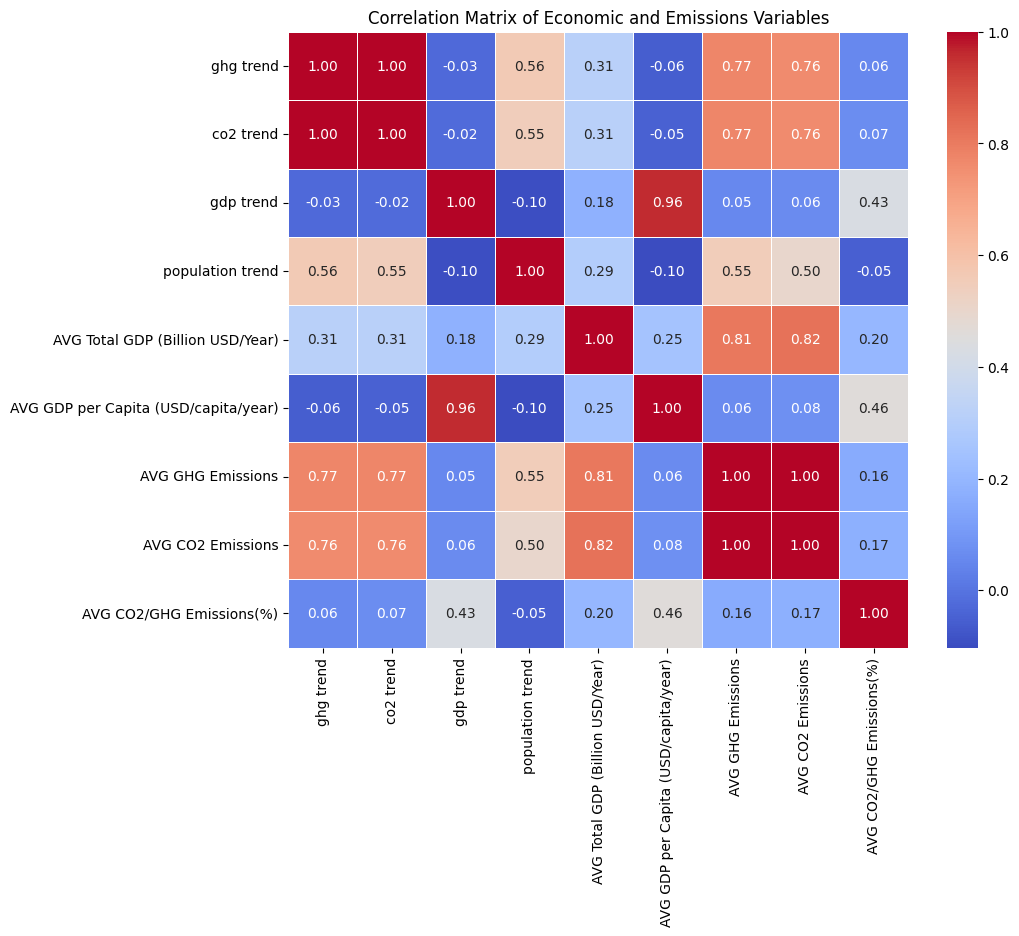

In [163]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขเพื่อสร้าง Heatmap
numeric_cols = ["ghg trend", "co2 trend", "gdp trend", "population trend",
                "AVG Total GDP (Billion USD/Year)", "AVG GDP per Capita (USD/capita/year)",
                "AVG GHG Emissions", "AVG CO2 Emissions", "AVG CO2/GHG Emissions(%)"]

# คำนวณ Correlation Matrix
corr_matrix = trend_tgdp19902024[numeric_cols].corr()

# กำหนดขนาดของกราฟ
plt.figure(figsize=(10, 8))

# สร้าง Heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# ตั้งค่าหัวข้อ
plt.title("Correlation Matrix of Economic and Emissions Variables")

# แสดงกราฟ
plt.show()

In [164]:
#cgdp19902024.to_excel('cgdp19902024.xlsx', index=False, sheet_name='Sheet1')
#trend_tgdp19902024.to_excel('trend_tgdp19902024.xlsx', index=False, sheet_name='Sheet1')
#sorted_top_3_countries_per_group.to_excel('sorted_top_3_countries_per_group.xlsx', index=False, sheet_name='Sheet1')
#cosea.to_excel('cosea.xlsx', index=False, sheet_name='Sheet1')


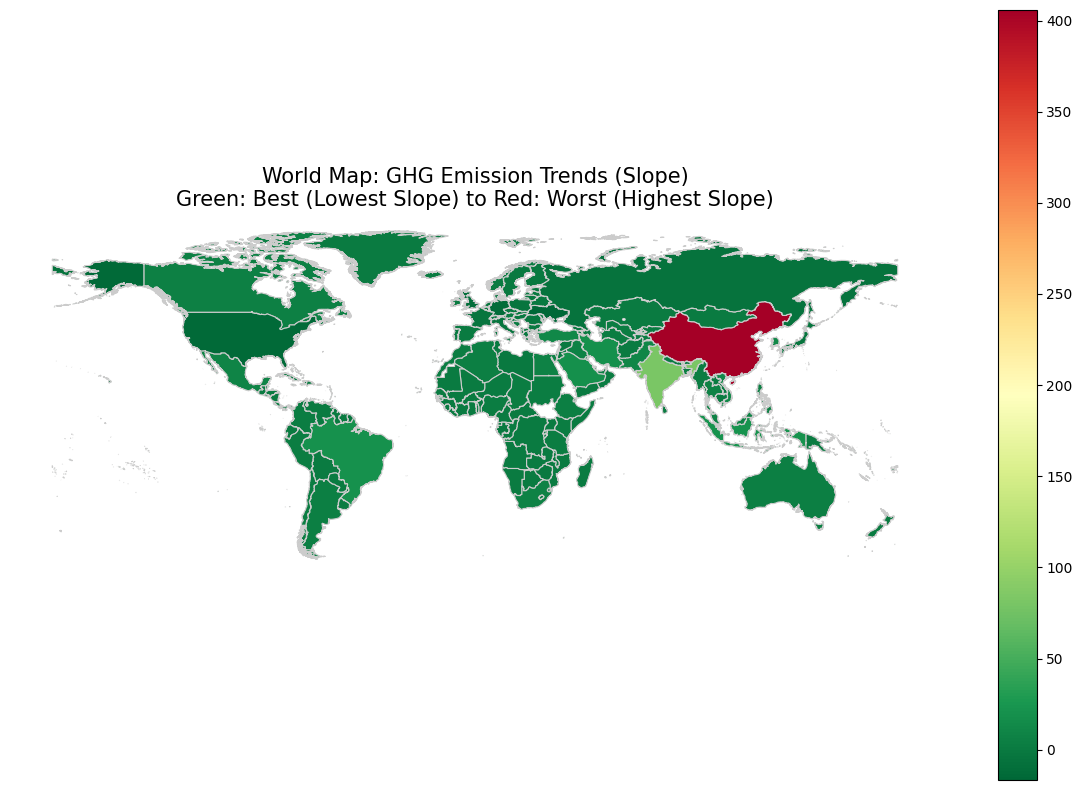

In [165]:
import geopandas as gpd

# Load world boundaries from an online GeoJSON source
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Merge your trend data with the world GeoDataFrame.
# Here, trend_df has a column 'Country Code' that we assume contains ISO-3 codes,
# which correspond to the 'ISO_A3' column in the world GeoDataFrame.
merged = world.merge(trend_tgdp19902024, left_on='ISO_A3', right_on='Country Code', how='left')

# Plot the choropleth map using the 'co2 trend' column.
# We use the colormap 'RdYlGn_r' so that higher (worsening) trends are red and lower (improving) trends are green.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='ghg trend', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set a title and remove the axes for a cleaner look.
ax.set_title('World Map: GHG Emission Trends (Slope)\nGreen: Best (Lowest Slope) to Red: Worst (Highest Slope)', fontsize=15)
ax.set_axis_off()

plt.show()

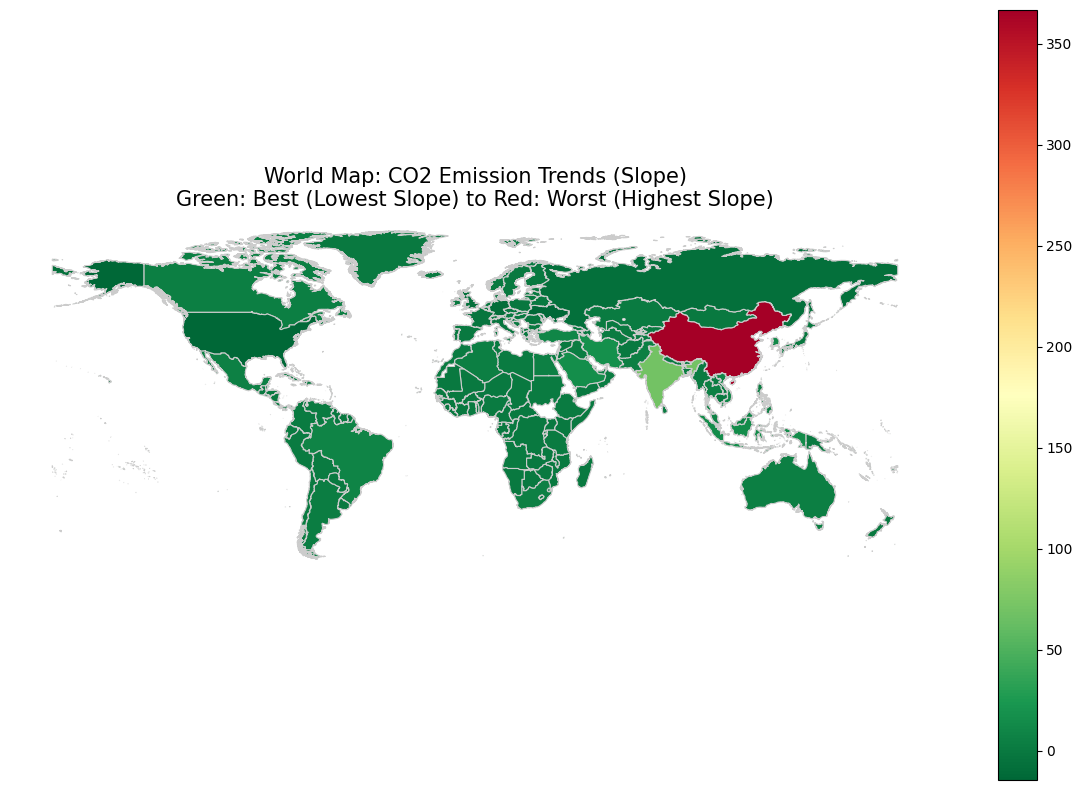

In [166]:
import geopandas as gpd

# Load world boundaries from an online GeoJSON source
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Merge your trend data with the world GeoDataFrame.
# Here, trend_df has a column 'Country Code' that we assume contains ISO-3 codes,
# which correspond to the 'ISO_A3' column in the world GeoDataFrame.
merged = world.merge(trend_tgdp19902024, left_on='ISO_A3', right_on='Country Code', how='left')

# Plot the choropleth map using the 'co2 trend' column.
# We use the colormap 'RdYlGn_r' so that higher (worsening) trends are red and lower (improving) trends are green.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='co2 trend', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set a title and remove the axes for a cleaner look.
ax.set_title('World Map: CO2 Emission Trends (Slope)\nGreen: Best (Lowest Slope) to Red: Worst (Highest Slope)', fontsize=15)
ax.set_axis_off()

plt.show()

<ipython-input-167-a60317183b64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="co2 trend", y="Country", data=top_10_co2, palette="Reds_r")


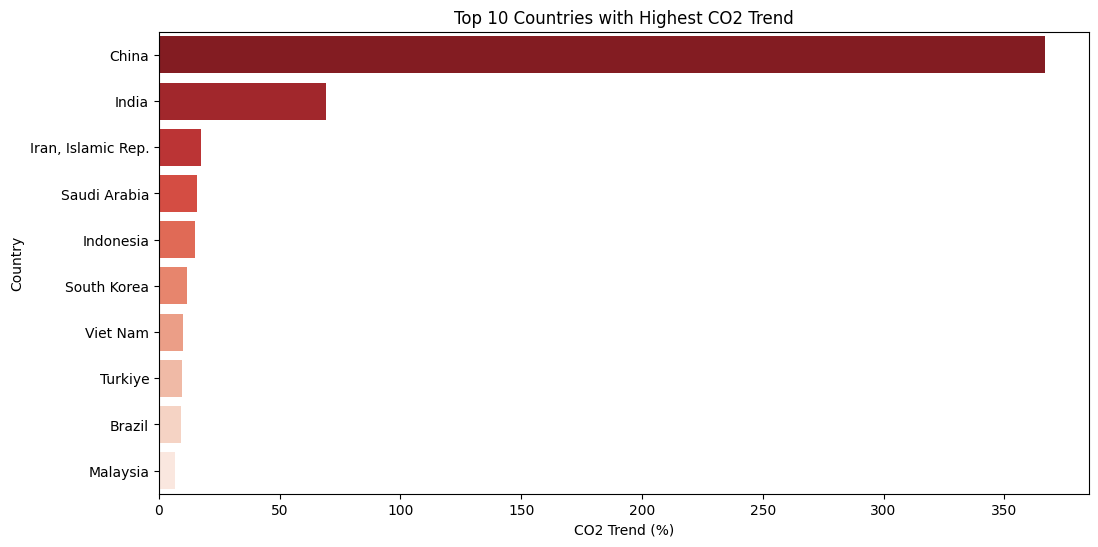

In [167]:
# เลือก 10 ประเทศที่มีค่า CO2 Trend สูงสุดจาก DataFrame trend_tgdp19902024
top_10_co2 = trend_tgdp19902024.nlargest(10, "co2 trend")

# กำหนดขนาดของกราฟ
plt.figure(figsize=(12, 6))

# สร้าง Bar Chart
sns.barplot(x="co2 trend", y="Country", data=top_10_co2, palette="Reds_r")

# ตั้งค่าป้ายชื่อและหัวข้อ
plt.xlabel("CO2 Trend (%)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest CO2 Trend")

# แสดงกราฟ
plt.show()


<ipython-input-168-ad4944e8ee15>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="co2 trend", y="Country", data=bottom_10_co2, palette="Blues_r")


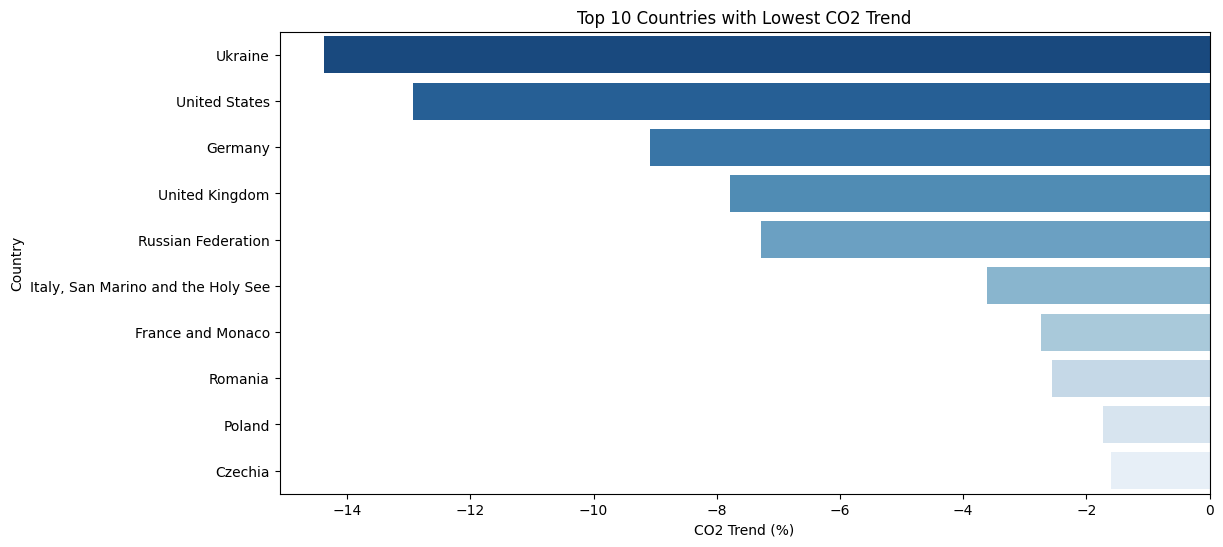

In [168]:
# เลือก 10 ประเทศที่มีค่า CO2 Trend ต่ำสุดจาก DataFrame trend_tgdp19902024
bottom_10_co2 = trend_tgdp19902024.nsmallest(10, "co2 trend")

# กำหนดขนาดของกราฟ
plt.figure(figsize=(12, 6))

# สร้าง Bar Chart
sns.barplot(x="co2 trend", y="Country", data=bottom_10_co2, palette="Blues_r")

# ตั้งค่าป้ายชื่อและหัวข้อ
plt.xlabel("CO2 Trend (%)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Lowest CO2 Trend")

# แสดงกราฟ
plt.show()

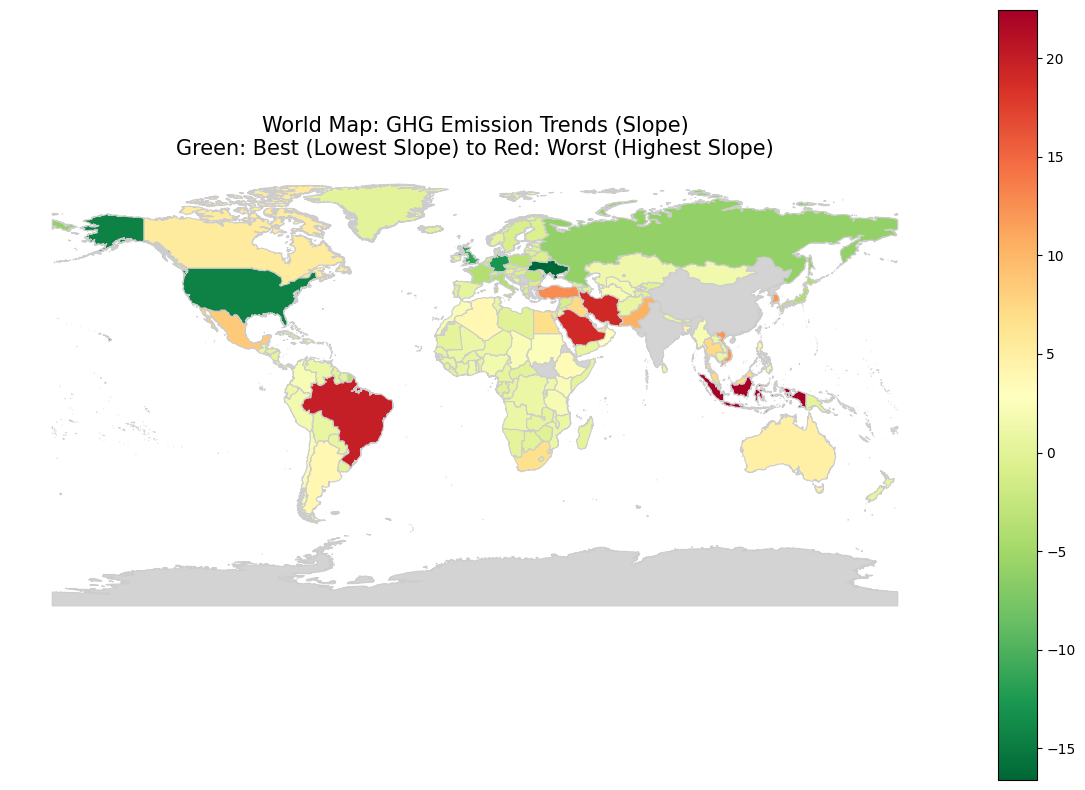

In [169]:
# Load world boundaries from an online GeoJSON source
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Merge trend data with world GeoDataFrame (assuming df_trend has 'Country Code' as ISO-3 codes)
merged = world.merge(trend_tgdp19902024, left_on='ISO_A3', right_on='Country Code', how='left')

# 🔴 **เปลี่ยนค่า CO2 Trend ของ China และ India เป็น NaN แทนการลบ**
merged.loc[merged["Country"].isin(["China", "India"]), "ghg trend"] = None

# Plot the choropleth map using the 'co2 trend' column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column='ghg trend',
    cmap='RdYlGn_r',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={"color": "lightgrey"}  # **ทำให้ประเทศที่ไม่มีค่า (NaN) เป็นสีเทา**
)

# Set title and remove axes for a cleaner look
ax.set_title('World Map: GHG Emission Trends (Slope)\nGreen: Best (Lowest Slope) to Red: Worst (Highest Slope)', fontsize=15)
ax.set_axis_off()

plt.show()

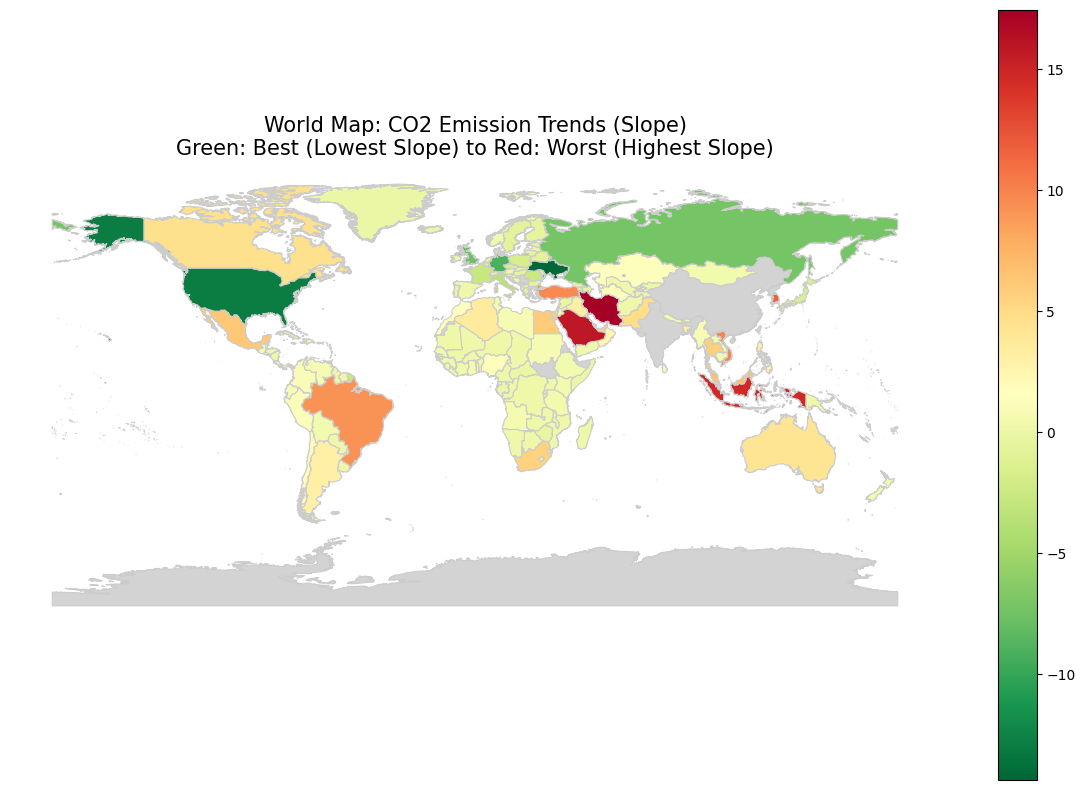

In [170]:
# Load world boundaries from an online GeoJSON source
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Merge trend data with world GeoDataFrame (assuming df_trend has 'Country Code' as ISO-3 codes)
merged = world.merge(trend_tgdp19902024, left_on='ISO_A3', right_on='Country Code', how='left')

# 🔴 **เปลี่ยนค่า CO2 Trend ของ China และ India เป็น NaN แทนการลบ**
merged.loc[merged["Country"].isin(["China", "India"]), "co2 trend"] = None

# Plot the choropleth map using the 'co2 trend' column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column='co2 trend',
    cmap='RdYlGn_r',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={"color": "lightgrey"}  # **ทำให้ประเทศที่ไม่มีค่า (NaN) เป็นสีเทา**
)

# Set title and remove axes for a cleaner look
ax.set_title('World Map: CO2 Emission Trends (Slope)\nGreen: Best (Lowest Slope) to Red: Worst (Highest Slope)', fontsize=15)
ax.set_axis_off()

plt.show()

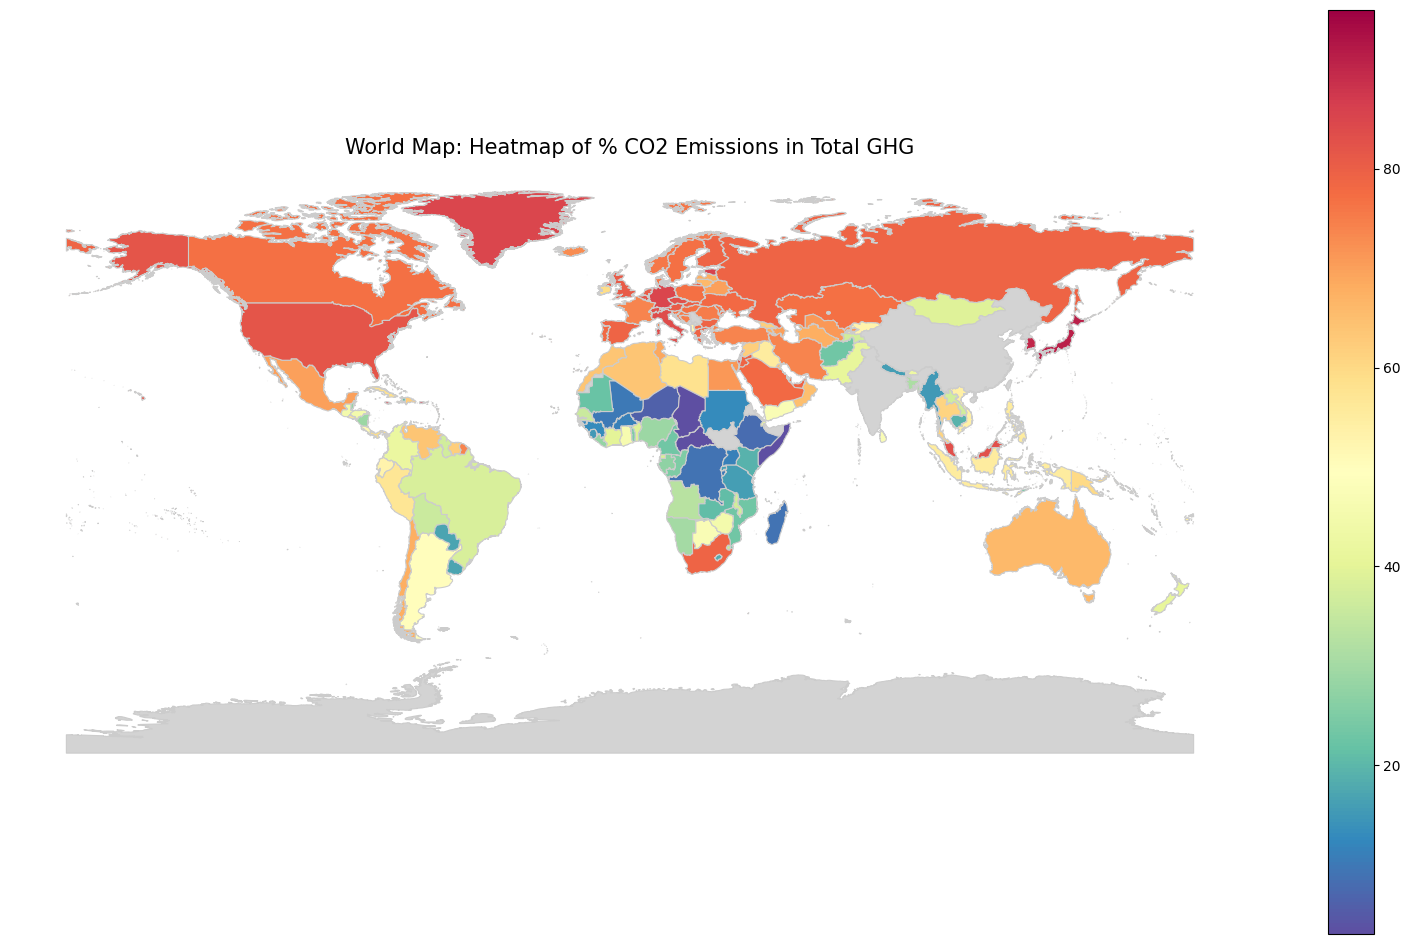

In [171]:
import geopandas as gpd

# Load world boundaries from an online GeoJSON source
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Merge your trend data with the world GeoDataFrame.
# Here, trend_df has a column 'Country Code' that we assume contains ISO-3 codes,
# which correspond to the 'ISO_A3' column in the world GeoDataFrame.
merged = world.merge(trend_tgdp19902024, left_on='ISO_A3', right_on='Country Code', how='left')

merged.loc[merged["Country"].isin(["China", "India"]), "AVG CO2/GHG Emissions(%)"] = None

# Plot the choropleth map using the 'co2 trend' column.
# We use the colormap 'RdYlGn_r' so that higher (worsening) trends are red and lower (improving) trends are green.
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
merged.plot(column='AVG CO2/GHG Emissions(%)', cmap='Spectral_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})

# Set a title and remove the axes for a cleaner look.
ax.set_title('World Map: Heatmap of % CO2 Emissions in Total GHG', fontsize=15)
ax.set_axis_off()

plt.show()

In [172]:
# Create a new DataFrame with only negative "co2 trend" values
filtered_df = trend_tgdp19902024[trend_tgdp19902024["co2 trend"] < 0]

# Include Thailand in the new DataFrame
thailand_data = trend_tgdp19902024[trend_tgdp19902024["Country"] == "Thailand"]
filtered_df = pd.concat([filtered_df, thailand_data], ignore_index=True)

sorted_df = filtered_df.sort_values(by=['co2 trend'], ascending=True)
sorted_df.head() #To display the first few rows of the sorted DataFrame

,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
41,Ukraine,UKR,-16.598762,-14.379525,101.322016,-2.888049e+05,107.072652,2322.395931,458.941246,354.196544,78,Lower-middle economy,Lower-middle income
43,United States,USA,-14.392124,-12.936943,1473.901263,2.651317e+06,14142.567147,46242.937364,6561.080159,5329.549723,82,Major economy,High-income
16,Germany,DEU,-12.802612,-9.091346,935.430109,6.024500e+04,3070.025979,37422.827208,977.634083,828.747827,85,Large economy,High-income
42,United Kingdom,GBR,-11.441907,-7.781006,915.098539,3.438992e+05,2253.120679,35974.936991,608.267405,489.453775,81,Large economy,High-income
35,Russian Federation,RUS,-5.954407,-7.286774,399.362130,-1.461918e+05,1085.045603,7508.516630,2317.824418,1831.036980,79,Upper-middle economy,Upper-middle income


<ipython-input-173-9cfeaf09cabe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="co2 trend", y="Country", data=sorted_df, palette="coolwarm")


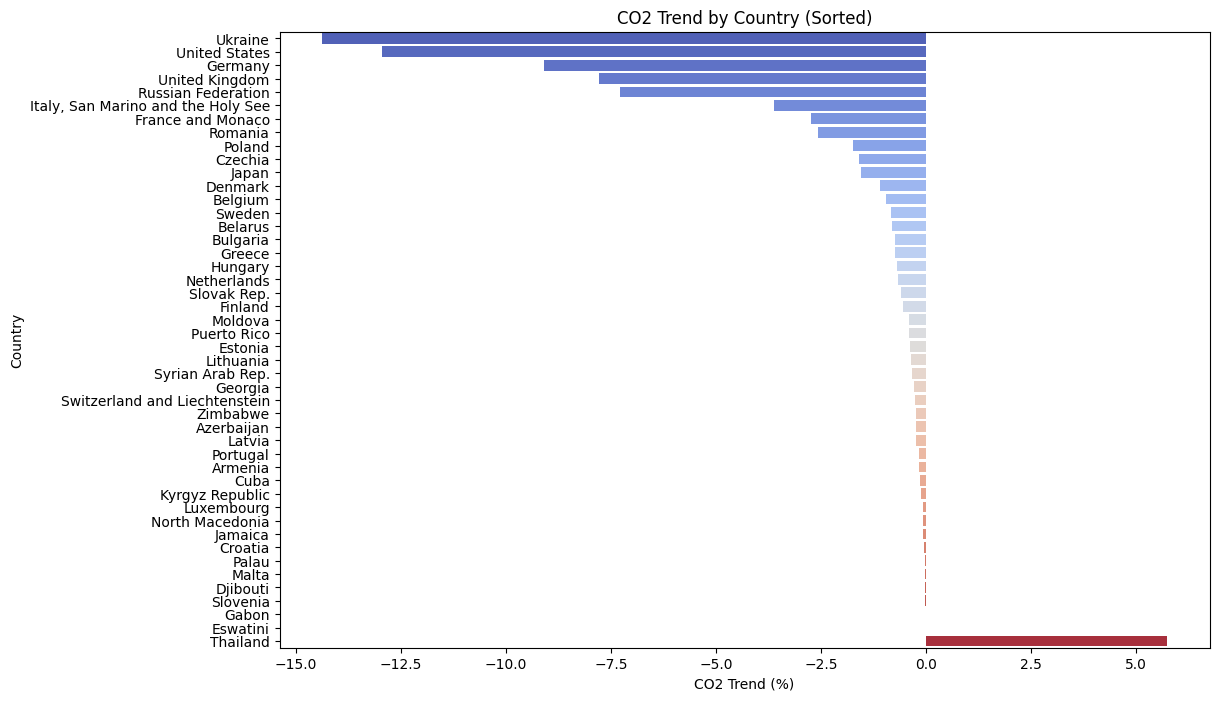

In [173]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
sns.barplot(x="co2 trend", y="Country", data=sorted_df, palette="coolwarm")

# Set labels and title
plt.xlabel("CO2 Trend (%)")
plt.ylabel("Country")
plt.title("CO2 Trend by Country (Sorted)")

# Show the plot
plt.show()

In [174]:
top15 = filtered_df.sort_values(by=['co2 trend'], ascending=True).head(15)
thailand_data = trend_tgdp19902024[trend_tgdp19902024["Country"] == "Thailand"]

top15t = pd.concat([top15, thailand_data], ignore_index=True)

In [175]:
top15t

,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
0,Ukraine,UKR,-16.598762,-14.379525,101.322016,-2.888049e+05,107.072652,2322.395931,458.941246,354.196544,78,Lower-middle economy,Lower-middle income
1,United States,USA,-14.392124,-12.936943,1473.901263,2.651317e+06,14142.567147,46242.937364,6561.080159,5329.549723,82,Major economy,High-income
2,Germany,DEU,-12.802612,-9.091346,935.430109,6.024500e+04,3070.025979,37422.827208,977.634083,828.747827,85,Large economy,High-income
3,United Kingdom,GBR,-11.441907,-7.781006,915.098539,3.438992e+05,2253.120679,35974.936991,608.267405,489.453775,81,Large economy,High-income
4,Russian Federation,RUS,-5.954407,-7.286774,399.362130,-1.461918e+05,1085.045603,7508.516630,2317.824418,1831.036980,79,Upper-middle economy,Upper-middle income
5,"Italy, San Marino and the Holy See",ITA,-4.002578,-3.615513,578.434742,1.306725e+05,1736.816852,29620.548902,490.118571,409.143348,84,Large economy,High-income
6,France and Monaco,FRA,-3.907169,-2.737128,762.545764,3.273586e+05,2162.962974,33689.070399,502.630109,369.352761,74,Large economy,High-income
7,Romania,ROU,-2.833893,-2.558026,452.589019,-1.380757e+05,134.169748,6686.835093,138.670797,102.732521,75,Lower-middle economy,Upper-middle income
8,Poland,POL,-3.484046,-1.723316,533.646165,-2.799981e+04,364.820539,9631.055003,426.269105,327.986926,77,Lower-middle economy,Upper-middle income
9,Czechia,CZE,-1.743610,-1.595066,787.980568,1.226189e+04,154.745058,14749.705081,148.036386,122.749278,83,Lower-middle economy,High-income


In [176]:
# แก้ไขชื่อประเทศในคอลัมน์ 'Country'
top15t['Country'] = top15t['Country'].replace({
    "Italy, San Marino and the Holy See": "Italy",
    "France and Monaco": "France",
    "Russian Federation": "Russian"
})

<ipython-input-177-2dfa6fdb3dea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="co2 trend", y="Country", data=top15t, palette="coolwarm")


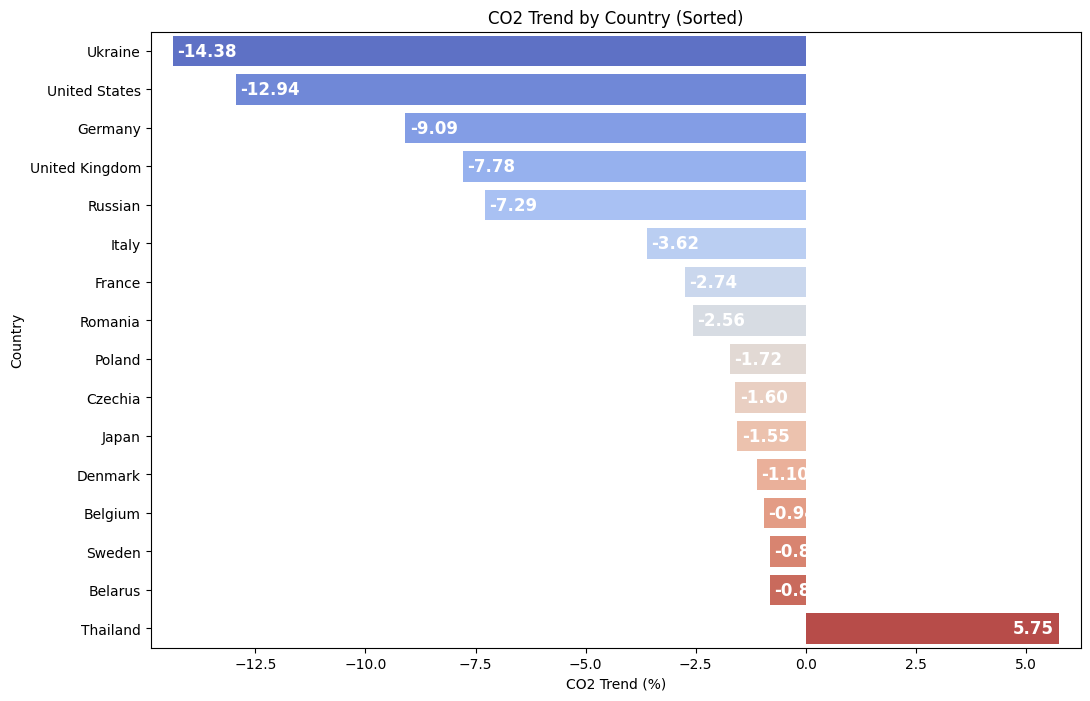

In [177]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
ax = sns.barplot(x="co2 trend", y="Country", data=top15t, palette="coolwarm")

# Add text labels to the bars
for p in ax.patches:
    width = p.get_width()
    # Check if the value is negative and adjust position accordingly
    x_position = width - 0.1 if width > 0 else width + 0.1  # Adjust for negative values

    plt.text(x_position,
             p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width),  # Format with negative sign if needed
             ha="right" if width > 0 else "left",  # Align text based on sign
             va="center", color='white',
             fontweight='bold', fontsize=12) # Make text bold and larger

# Adjust x-axis limits to prevent text from being cut off
plt.xlim([top15t['co2 trend'].min() - 0.5, top15t['co2 trend'].max() + 0.5])

# Set labels and title
plt.xlabel("CO2 Trend (%)")
plt.ylabel("Country")
plt.title("CO2 Trend by Country (Sorted)")

# Show the plot
plt.show()

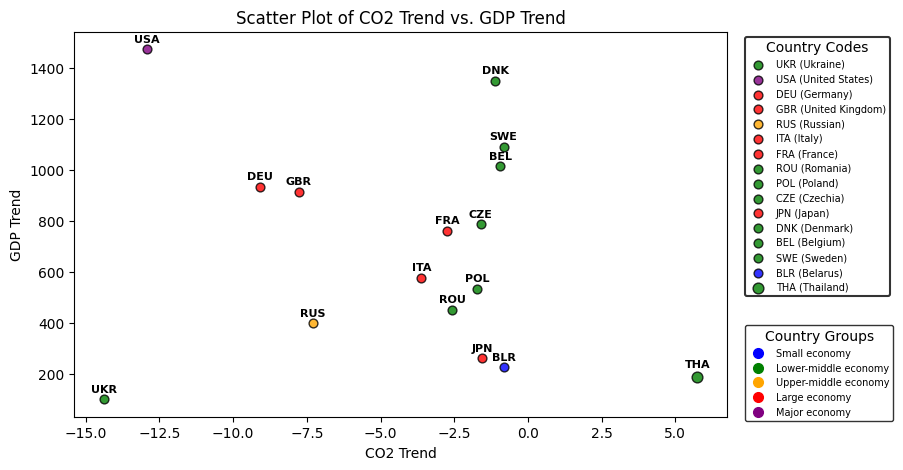

In [178]:
# Define colors for each country group
country_group_colors = {
    "Small economy": "blue",
    "Lower-middle economy": "green",
    "Upper-middle economy": "orange",
    "Large economy": "red",
    "Major economy": "purple"
}

# Create figure (ลดขนาดกราฟ และเพิ่มที่ว่างสำหรับ Legend)
fig, ax = plt.subplots(figsize=(9, 5))

# Store legend handles for Country Codes
country_legend_handles = []
unique_labels = {}

# ปรับ offset สำหรับ Label ให้อยู่ด้านบนของ Bubble และมีระยะห่างที่เหมาะสม
y_offset_factor = 0.5  # เพิ่มค่าเพื่อให้ Label อยู่สูงขึ้นจาก Bubble

# Plot scatter points
for index, row in top15t.iterrows():
    country_code = row['Country Code']
    country = row['Country']
    co2_trend = row['co2 trend']
    gdp_trend = row['gdp trend']
    country_group = row['Country Group by Total GDP']

    marker_size = 60 if country == "Thailand" else 40  # ลดขนาด Marker ลงเล็กน้อย
    y_offset = marker_size * y_offset_factor  # คำนวณระยะ Offset อัตโนมัติ

    # Scatter plot
    sc = ax.scatter(co2_trend, gdp_trend,
                     color=country_group_colors.get(country_group, 'gray'),
                     s=marker_size, edgecolors='black', alpha=0.8)

    # Add country code text (เลื่อนขึ้นด้านบนและเพิ่มระยะห่าง)
    ax.text(co2_trend, gdp_trend + y_offset, country_code,
            fontsize=8, ha='center', va='bottom', fontweight='bold')

    # Store handle for country legend if unique
    if country_code not in unique_labels:
        unique_labels[country_code] = sc
        country_legend_handles.append((sc, f"{country_code} ({country})"))

# Set labels and title
ax.set_xlabel("CO2 Trend")
ax.set_ylabel("GDP Trend")
ax.set_title("Scatter Plot of CO2 Trend vs. GDP Trend")

# Adjust plot layout to give more space to legends
plt.subplots_adjust(right=0.85)  # ขยายพื้นที่ว่างด้านขวาให้ Legend

# Create Country Code Legend (เพิ่มกรอบเต็ม)
legend1 = ax.legend([h[0] for h in country_legend_handles],
                     [h[1] for h in country_legend_handles],
                     loc="upper left", bbox_to_anchor=(1.02, 1),
                     title="Country Codes", fontsize=7, frameon=True,
                     edgecolor="black", prop={'size': 7}, columnspacing=1.1)

# เพิ่มเส้นกรอบเต็มของ Legend
legend1.get_frame().set_linewidth(1.5)  # กำหนดความหนาของกรอบให้ชัดเจนขึ้น

# Create Country Group Legend
proxy_artists = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=7)
                 for color in country_group_colors.values()]

legend2 = ax.legend(proxy_artists, country_group_colors.keys(),
                     loc="upper left", bbox_to_anchor=(1.02, 0.25),
                     title="Country Groups", fontsize=7, frameon=True,
                     edgecolor="black", prop={'size': 7}, columnspacing=1.1)

# Add the legends to the plot
ax.add_artist(legend1)

# Show the plot
plt.show()


In [179]:
top15t

,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
0,Ukraine,UKR,-16.598762,-14.379525,101.322016,-2.888049e+05,107.072652,2322.395931,458.941246,354.196544,78,Lower-middle economy,Lower-middle income
1,United States,USA,-14.392124,-12.936943,1473.901263,2.651317e+06,14142.567147,46242.937364,6561.080159,5329.549723,82,Major economy,High-income
2,Germany,DEU,-12.802612,-9.091346,935.430109,6.024500e+04,3070.025979,37422.827208,977.634083,828.747827,85,Large economy,High-income
3,United Kingdom,GBR,-11.441907,-7.781006,915.098539,3.438992e+05,2253.120679,35974.936991,608.267405,489.453775,81,Large economy,High-income
4,Russian,RUS,-5.954407,-7.286774,399.362130,-1.461918e+05,1085.045603,7508.516630,2317.824418,1831.036980,79,Upper-middle economy,Upper-middle income
5,Italy,ITA,-4.002578,-3.615513,578.434742,1.306725e+05,1736.816852,29620.548902,490.118571,409.143348,84,Large economy,High-income
6,France,FRA,-3.907169,-2.737128,762.545764,3.273586e+05,2162.962974,33689.070399,502.630109,369.352761,74,Large economy,High-income
7,Romania,ROU,-2.833893,-2.558026,452.589019,-1.380757e+05,134.169748,6686.835093,138.670797,102.732521,75,Lower-middle economy,Upper-middle income
8,Poland,POL,-3.484046,-1.723316,533.646165,-2.799981e+04,364.820539,9631.055003,426.269105,327.986926,77,Lower-middle economy,Upper-middle income
9,Czechia,CZE,-1.743610,-1.595066,787.980568,1.226189e+04,154.745058,14749.705081,148.036386,122.749278,83,Lower-middle economy,High-income


In [182]:
# กรองข้อมูลเฉพาะที่มี "Country Group by Total GDP" เป็น "Lower-middle economy"
# และ "Country Group by GDP per Capita" เป็น "High-income"
filtered_df = top15t[
    (top15t["Country Group by Total GDP"] == "Lower-middle economy") &
    (top15t["Country Group by GDP per Capita"] == "High-income")
]

# เรียงลำดับตามค่า "co2 trend" จากน้อยไปมาก
sorted_df = filtered_df.sort_values(by="co2 trend", ascending=True)

# แสดงผลลัพธ์ให้ผู้ใช้ดู
print(sorted_df)

    Country Country Code  ghg trend  co2 trend    gdp trend  population trend  \
9   Czechia          CZE  -1.743610  -1.595066   787.980568      12261.889610   
11  Denmark          DNK  -1.158745  -1.101881  1350.908502      23045.471072   
12  Belgium          BEL  -1.003571  -0.941682  1015.422783      55291.322409   
13   Sweden          SWE  -0.970284  -0.821162  1091.644113      56595.422969   

    AVG Total GDP (Billion USD/Year)  AVG GDP per Capita (USD/capita/year)  \
9                         154.745058                          14749.705081   
11                        266.603208                          47984.453209   
12                        399.842668                          36733.489925   
13                        415.741196                          43871.014589   

    AVG GHG Emissions  AVG CO2 Emissions  AVG CO2/GHG Emissions(%)  \
9          148.036386         122.749278                        83   
11          63.798683          48.160902                       

In [183]:
sorted_df

,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
9,Czechia,CZE,-1.743610,-1.595066,787.980568,12261.889610,154.745058,14749.705081,148.036386,122.749278,83,Lower-middle economy,High-income
11,Denmark,DNK,-1.158745,-1.101881,1350.908502,23045.471072,266.603208,47984.453209,63.798683,48.160902,76,Lower-middle economy,High-income
12,Belgium,BEL,-1.003571,-0.941682,1015.422783,55291.322409,399.842668,36733.489925,136.039029,111.506528,82,Lower-middle economy,High-income
13,Sweden,SWE,-0.970284,-0.821162,1091.644113,56595.422969,415.741196,43871.014589,67.918161,51.716048,77,Lower-middle economy,High-income


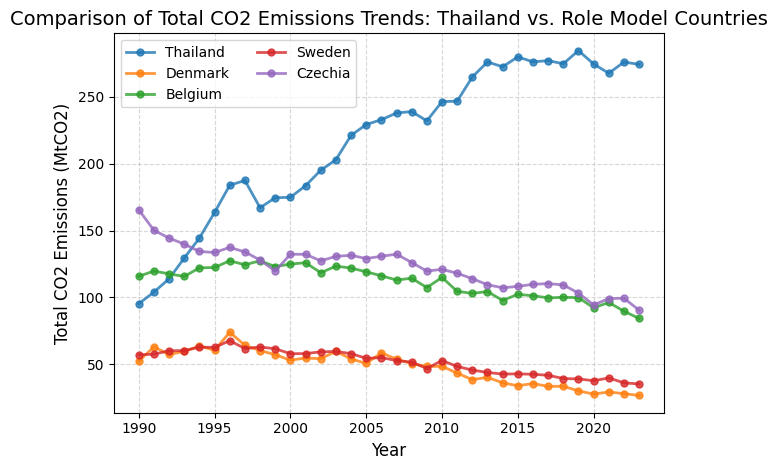

In [184]:
# Define unique countries
unique_countries = ["Thailand", "Denmark", "Belgium", "Sweden", "Czechia"]

# Plot unique countries with a distinct style and reduced linewidth
for country in unique_countries:
    df_country = cgdp19902024[cgdp19902024['Country'] == country]
    plt.plot(df_country['Year'], df_country['Total CO2 Emissions (MtCO2)'],
             label=country, marker='o', markersize=5,
             linewidth=2, linestyle='-', alpha=0.8)

# Labels & Title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (MtCO2)', fontsize=12)
plt.title('Comparison of Total CO2 Emissions Trends: Thailand vs. Role Model Countries', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)

# Remove plt.xlim() to let Matplotlib auto-scale the x-axis
# plt.xlim(1990, 2030)  # This line is removed

# Show plot
plt.tight_layout()
plt.show()

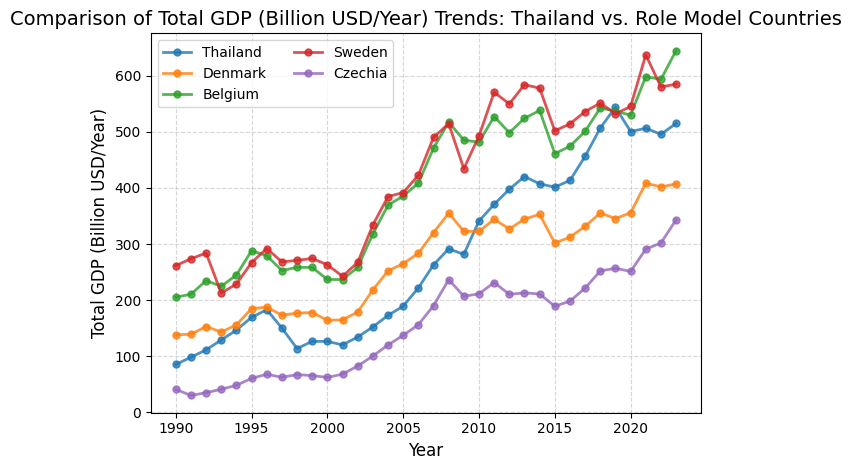

In [185]:
# Plot unique countries with a distinct style and reduced linewidth
for country in unique_countries:
    df_country = cgdp19902024[cgdp19902024['Country'] == country]
    plt.plot(df_country['Year'], df_country['Total GDP (Billion USD/Year)'],
             label=country, marker='o', markersize=5,
             linewidth=2, linestyle='-', alpha=0.8)

# Labels & Title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GDP (Billion USD/Year)', fontsize=12)
plt.title('Comparison of Total GDP (Billion USD/Year) Trends: Thailand vs. Role Model Countries', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)

# Remove plt.xlim() to let Matplotlib auto-scale the x-axis
# plt.xlim(1990, 2030)  # This line is removed

# Show plot
plt.tight_layout()
plt.show()

In [186]:
# Define a list of Southeast Asian countries
southeast_asia_countries = [
    "Brunei Darussalam", "Cambodia", "Indonesia", "Lao PDR", "Malaysia",
    "Myanmar", "Philippines", "Singapore", "Thailand", "Viet Nam"
]

# Filter the DataFrame to include only Southeast Asian countries
cosea = trend_tgdp19902024[trend_tgdp19902024["Country"].isin(southeast_asia_countries)]

# Instead of using ace_tools, display the DataFrame using pandas' display function
display(cosea.style.set_caption("Southeast Asia Data"))
# or
# print(cosea) # If you prefer a simpler output
# or
# cosea.head() # To display the first few rows


,Country,Country Code,ghg trend,co2 trend,gdp trend,population trend,AVG Total GDP (Billion USD/Year),AVG GDP per Capita (USD/capita/year),AVG GHG Emissions,AVG CO2 Emissions,AVG CO2/GHG Emissions(%),Country Group by Total GDP,Country Group by GDP per Capita
25,Brunei Darussalam,BRN,0.171253,0.134220,457.742756,6356.671861,10.981753,29246.759368,9.443355,7.115966,76,Small economy,High-income
30,Cambodia,KHM,0.891734,0.474461,66.225257,286011.388999,14.563783,958.100998,30.767732,5.816324,19,Small economy,Low-income
81,Indonesia,IDN,22.436079,14.755232,132.755522,3016058.863407,558.423365,2205.880450,738.388898,401.431490,55,Upper-middle economy,Lower-middle income
95,Lao PDR,LAO,0.898169,0.644458,82.109079,96933.196715,7.356059,1094.350752,17.281942,6.298545,37,Small economy,Low-income
106,Malaysia,MYS,7.350123,6.831263,301.532750,535912.139165,202.435311,7015.106772,217.401305,179.835950,83,Lower-middle economy,Upper-middle income
117,Myanmar,MMR,2.023439,0.858766,50.018464,422509.385103,32.512126,641.659733,98.911834,14.763966,15,Small economy,Low-income
135,Philippines,PHL,4.248701,3.006440,90.668044,1651898.983983,190.278935,1943.929285,164.182398,90.067822,55,Lower-middle economy,Lower-middle income
153,Singapore,SGP,0.994507,0.684153,1968.138536,90059.912019,206.023978,41079.717759,55.727058,46.494988,84,Lower-middle economy,High-income
169,Thailand,THA,7.260566,5.746912,188.328415,545515.760555,280.675267,4133.458275,359.230793,217.675753,61,Lower-middle economy,Lower-middle income
187,Viet Nam,VNM,12.074459,9.886517,121.019200,1052310.107028,138.584557,1499.677327,263.425561,140.094465,54,Lower-middle economy,Lower-middle income


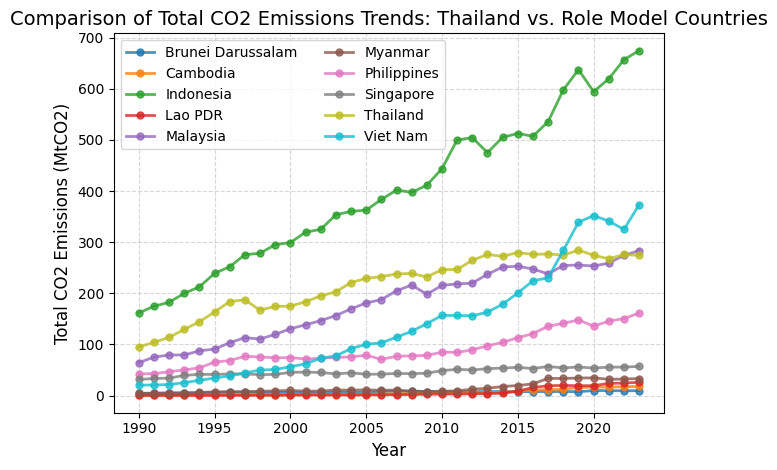

In [187]:
# Plot unique countries with a distinct style and reduced linewidth
for country in southeast_asia_countries:
    df_country = cgdp19902024[cgdp19902024['Country'] == country]
    plt.plot(df_country['Year'], df_country['Total CO2 Emissions (MtCO2)'],
             label=country, marker='o', markersize=5,
             linewidth=2, linestyle='-', alpha=0.8)

# Labels & Title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (MtCO2)', fontsize=12)
plt.title('Comparison of Total CO2 Emissions Trends: Thailand vs. Role Model Countries', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)

# Remove plt.xlim() to let Matplotlib auto-scale the x-axis
# plt.xlim(1990, 2030)  # This line is removed

# Show plot
plt.tight_layout()
plt.show()

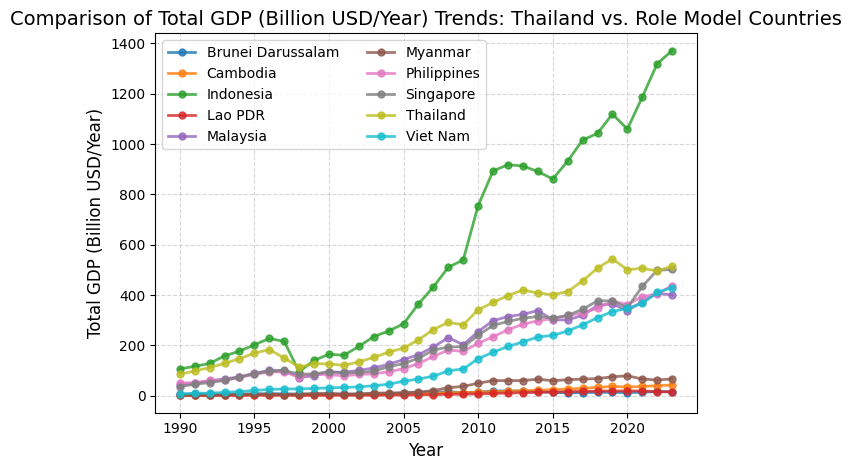

In [188]:
# Plot unique countries with a distinct style and reduced linewidth
for country in southeast_asia_countries:
    df_country = cgdp19902024[cgdp19902024['Country'] == country]
    plt.plot(df_country['Year'], df_country['Total GDP (Billion USD/Year)'],
             label=country, marker='o', markersize=5,
             linewidth=2, linestyle='-', alpha=0.8)

# Labels & Title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GDP (Billion USD/Year)', fontsize=12)
plt.title('Comparison of Total GDP (Billion USD/Year) Trends: Thailand vs. Role Model Countries', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)

# Remove plt.xlim() to let Matplotlib auto-scale the x-axis
# plt.xlim(1990, 2030)  # This line is removed

# Show plot
plt.tight_layout()
plt.show()